# **Introduction/Background**
Customer attrition is one of the biggest expenditures of any
organization. Customer churn otherwise known as customer attrition or
customer turnover is the percentage of customers that stopped using your
company\'s product or service within a specified timeframe.

For instance, if you began the year with **500 customers** but later ended
with **480 customers,** the percentage of customers that left would be **4%.**
If we could figure out **why a customer leaves and when they leave with
reasonable accuracy**, it would immensely help the organization to
strategize their retention initiatives manifold.

In this project, we aim to find the **likelihood of a customer leaving the
organization,** the **key indicators of churn** as well as **the retention
strategies** that can be implemented to avert this problem.

# **Statement Problem / Business Understanding**

A telecommunication company , vodaphone, wants to do a churn analysis on their company customers to try and understand why customers churn or do not churn, and predict whether they would churn or not churn.

They have given us a dataset to do an analysis on and build **Classification Models** to predict either **Churn OR not Churn**

# **Business Goals/ Success Definition**


*  Our findings should help the client innovate better methods, come up with more intelligent solutions and products to maximise customer retention margins by studying and predicting customer outcome.  
*    Create a better ML model with excellent F1 and F2 scores 




In [1]:
# # installing packages 
# !pip install pandas-profiling
# !pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 81.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=39b255b714b2886016ab4b7b305175c49a090d611d9b40dbc74fa9cc91390755
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [2]:
# importing necessary libraries 
import pandas as pd 
import numpy as np 

In [3]:
# Importing ML Libraries 
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

# Visualization libaries
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from sklearn.metrics import confusion_matrix

#Importing Encoders and scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

#Importing splitting module 
from sklearn.model_selection import train_test_split

#Importing Models 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn import svm # although is not a class but svm.SVC is its class

# Metrics 
from sklearn.metrics import accuracy_score
from sklearn import metrics

#Importing hyperparameter modulles
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance


# Import warning filter 
import warnings 
warnings.filterwarnings('ignore')

<ipython-input-3-31f5cdc72b13>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
# # Forcibly mount gdrive - we're working in colab 
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Read into our dataset

In [5]:
df_ = pd.read_csv('/content/drive/MyDrive/LP3 PROJECT /Telco-Customer-Churn.csv')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/LP3 PROJECT /Telco-Customer-Churn.csv')

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
df.shape

(7043, 21)

**LOOK AT OUR DATASET AND UNDERSTAND IT**

In [8]:
df.shape

(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Look at all the columns 
pd.DataFrame(df.head(0))

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

**INSPECTING FOR DTYPE - IF CORRECT**

In [11]:
# Look at all the columns 

pd.DataFrame(df.head(1))

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  

[1 rows x 21 columns]

In [12]:
# Check for dtype if its correct 

pd.DataFrame(df.dtypes).T

customerID  gender SeniorCitizen Partner Dependents tenure PhoneService  \
0     object  object         int64  object     object  int64       object   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0        object          object         object  ...           object   

  TechSupport StreamingTV StreamingMovies Contract PaperlessBilling  \
0      object      object          object   object           object   

  PaymentMethod MonthlyCharges TotalCharges   Churn  
0        object        float64       object  object  

[1 rows x 21 columns]

In [13]:
# Dtype of senior citizan marked as int64 

# inspect if this is correct 

# whwther it is categorical or numerical 

In [14]:
df['SeniorCitizen'].head()

0    0
1    0
2    0
3    0
4    0
Name: SeniorCitizen, dtype: int64

In [15]:
df['SeniorCitizen'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64>

In [16]:
df['SeniorCitizen'].unique().sum()

1

The column 'SeniorCitizen' is categorical , but it is listed as numeric / continuous. 
Because it only has 2 entries (I.e Logic 1 and Logic 0) , we will not convert it into a different dtype.

### **issue 1) Convert ['TotalCharges'] from object_dtype to float_dtype**

In [17]:
df['TotalCharges'].dtype

dtype('O')

In [18]:
# convert from object to float 

In [19]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [20]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



In [21]:
df['TotalCharges'].dtype

dtype('float64')

In [22]:
df['TotalCharges'].isna().sum()

11

**CAUTION / NOTE**

Because we had values that could not be converted to floats , probably string that were in the column, df['TotalCharges'], we couldn't use the asype('Int64') or the astypte(int) or the .apply funtion. 

We used the pd.to_numeric to help in realizing the conversion from categorical to numeric. The other values that are not understandable to pandas , will be converted to **NaN** values , 

In [23]:
# For the new missing values in df['TotalCharges'] , fill them in with the mean

### **Issue 2) Deal with the miising values converted to NaN**

In [24]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [25]:
# looking for a value to fill in the missing values that we have 


    
mean = df['TotalCharges'].mean()
median= df['TotalCharges'].median()
mode = df['TotalCharges'].mode().values[0]
minimum= df['TotalCharges'].min()
maximum= df['TotalCharges'].max()
        
print ('mean : ',  mean) 
print ('median :', median)
print ('mode :', mode)
print ('minimum : ', minimum )
print ('maximum :',  maximum)


mean :  2283.3004408418656
median : 1397.475
mode : 20.2
minimum :  18.8
maximum : 8684.8


In [26]:
# Inspect the df if ascending or descending 

df['TotalCharges'].head(5)

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [27]:
df['TotalCharges'].shape

(7043,)

**Deductions on the solution to employ**

Since the data is randomly put and there' a large diffence between the highest and minimum values , the mean, mode , maximum and minimum values are also far and widely spaced , we will not impute them with any. 

However it is worth noting that this are not missing values , but are values keyed in differently that the others. This might create **'more'** outliers. 

The best practise will be to drop them since they only **account to 11 of the 7043** values for the column 

In [28]:
df['TotalCharges'].dropna()

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [29]:
# Dropping na() values 
df = df.dropna(subset=['TotalCharges'])

In [30]:
# confirm if our changes have taken effect 
df['TotalCharges'].isna().sum()

0

In [31]:
df 

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

# USE PANDAS PROFILING TO SELECT THE MOST IMPORTANT FEATURES 

In [32]:

profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width': True}})


profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Issue 3) Identify and drop unwanted columns**

In [33]:
# Check unique values in every column
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

**columns to remove 1.** - gender, payment method

Gender : Is evenly balanced with alomst male to female ratio being 50 / 50

Payment Method : There are 3 options , we've realized that the payment method doesn't affect the client's subscribers since by the time the customer pays or not there are other factors

In [34]:
# Drop the columns 

columns_to_drop = ['gender', 'PaymentMethod']
df_dropped = df.drop(columns=columns_to_drop)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.0 MB/s eta 0:00:00


**Since streamingMovies and StreamingtV is the same, 
Remove 1 to reduce the size of the dataset**

In [36]:
# Drop the columns 
columns_to_drop2 = ['StreamingMovies']
df_dropped_ = df_dropped.drop(columns=columns_to_drop2)

In [37]:
df_dropped_.head()

customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG              0     Yes         No       1           No   
1  5575-GNVDE              0      No         No      34          Yes   
2  3668-QPYBK              0      No         No       2          Yes   
3  7795-CFOCW              0      No         No      45           No   
4  9237-HQITU              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV        Contract PaperlessBilling  \
0               No          No          No  Month-to-month              Yes   
1              Yes          No          No        One year               No   
2               No          No          No  Month-to-month              Yes   
3              Yes         Yes          No        One year               No   
4               No          No          No  Month-to-month              Yes   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes

The resulting dataFrame, has columns that we have identified to be useful . 

However , our univariate and Bivariate analysis will help us identify which columns are useful and if **need be, drop more columns further**

**Our Data Exploration, univariate and Bivariate analysis will reveal the columns that we may/may not drop for our analysis**

### **LOOK AT HOW EACH COLUMN RELATE TO CHURN COLUMN (our target column)**

In [38]:
df_new = df_dropped_.copy()

In [39]:
# convert churn to numerical column
df_dropped_['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
# Create a mapping dictionary
mapping = {'No': 1, 'Yes': 2 }

In [41]:
df_dropped_['Churn']= df_dropped_['Churn'].map(mapping)

In [42]:
# Display the DataFrame
print(df_dropped_.dtypes)

customerID           object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


# UNIVARIATE ANALYSIS 

In [43]:
df_new.head()

customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG              0     Yes         No       1           No   
1  5575-GNVDE              0      No         No      34          Yes   
2  3668-QPYBK              0      No         No       2          Yes   
3  7795-CFOCW              0      No         No      45           No   
4  9237-HQITU              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV        Contract PaperlessBilling  \
0               No          No          No  Month-to-month              Yes   
1              Yes          No          No        One year               No   
2               No          No          No  Month-to-month              Yes   
3              Yes         Yes          No        One year               No   
4               No          No          No  Month-to-month              Yes   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes

**Before proceeding to the univariate analysis , Use a pairplot to see how the datasets relate with rach other.**

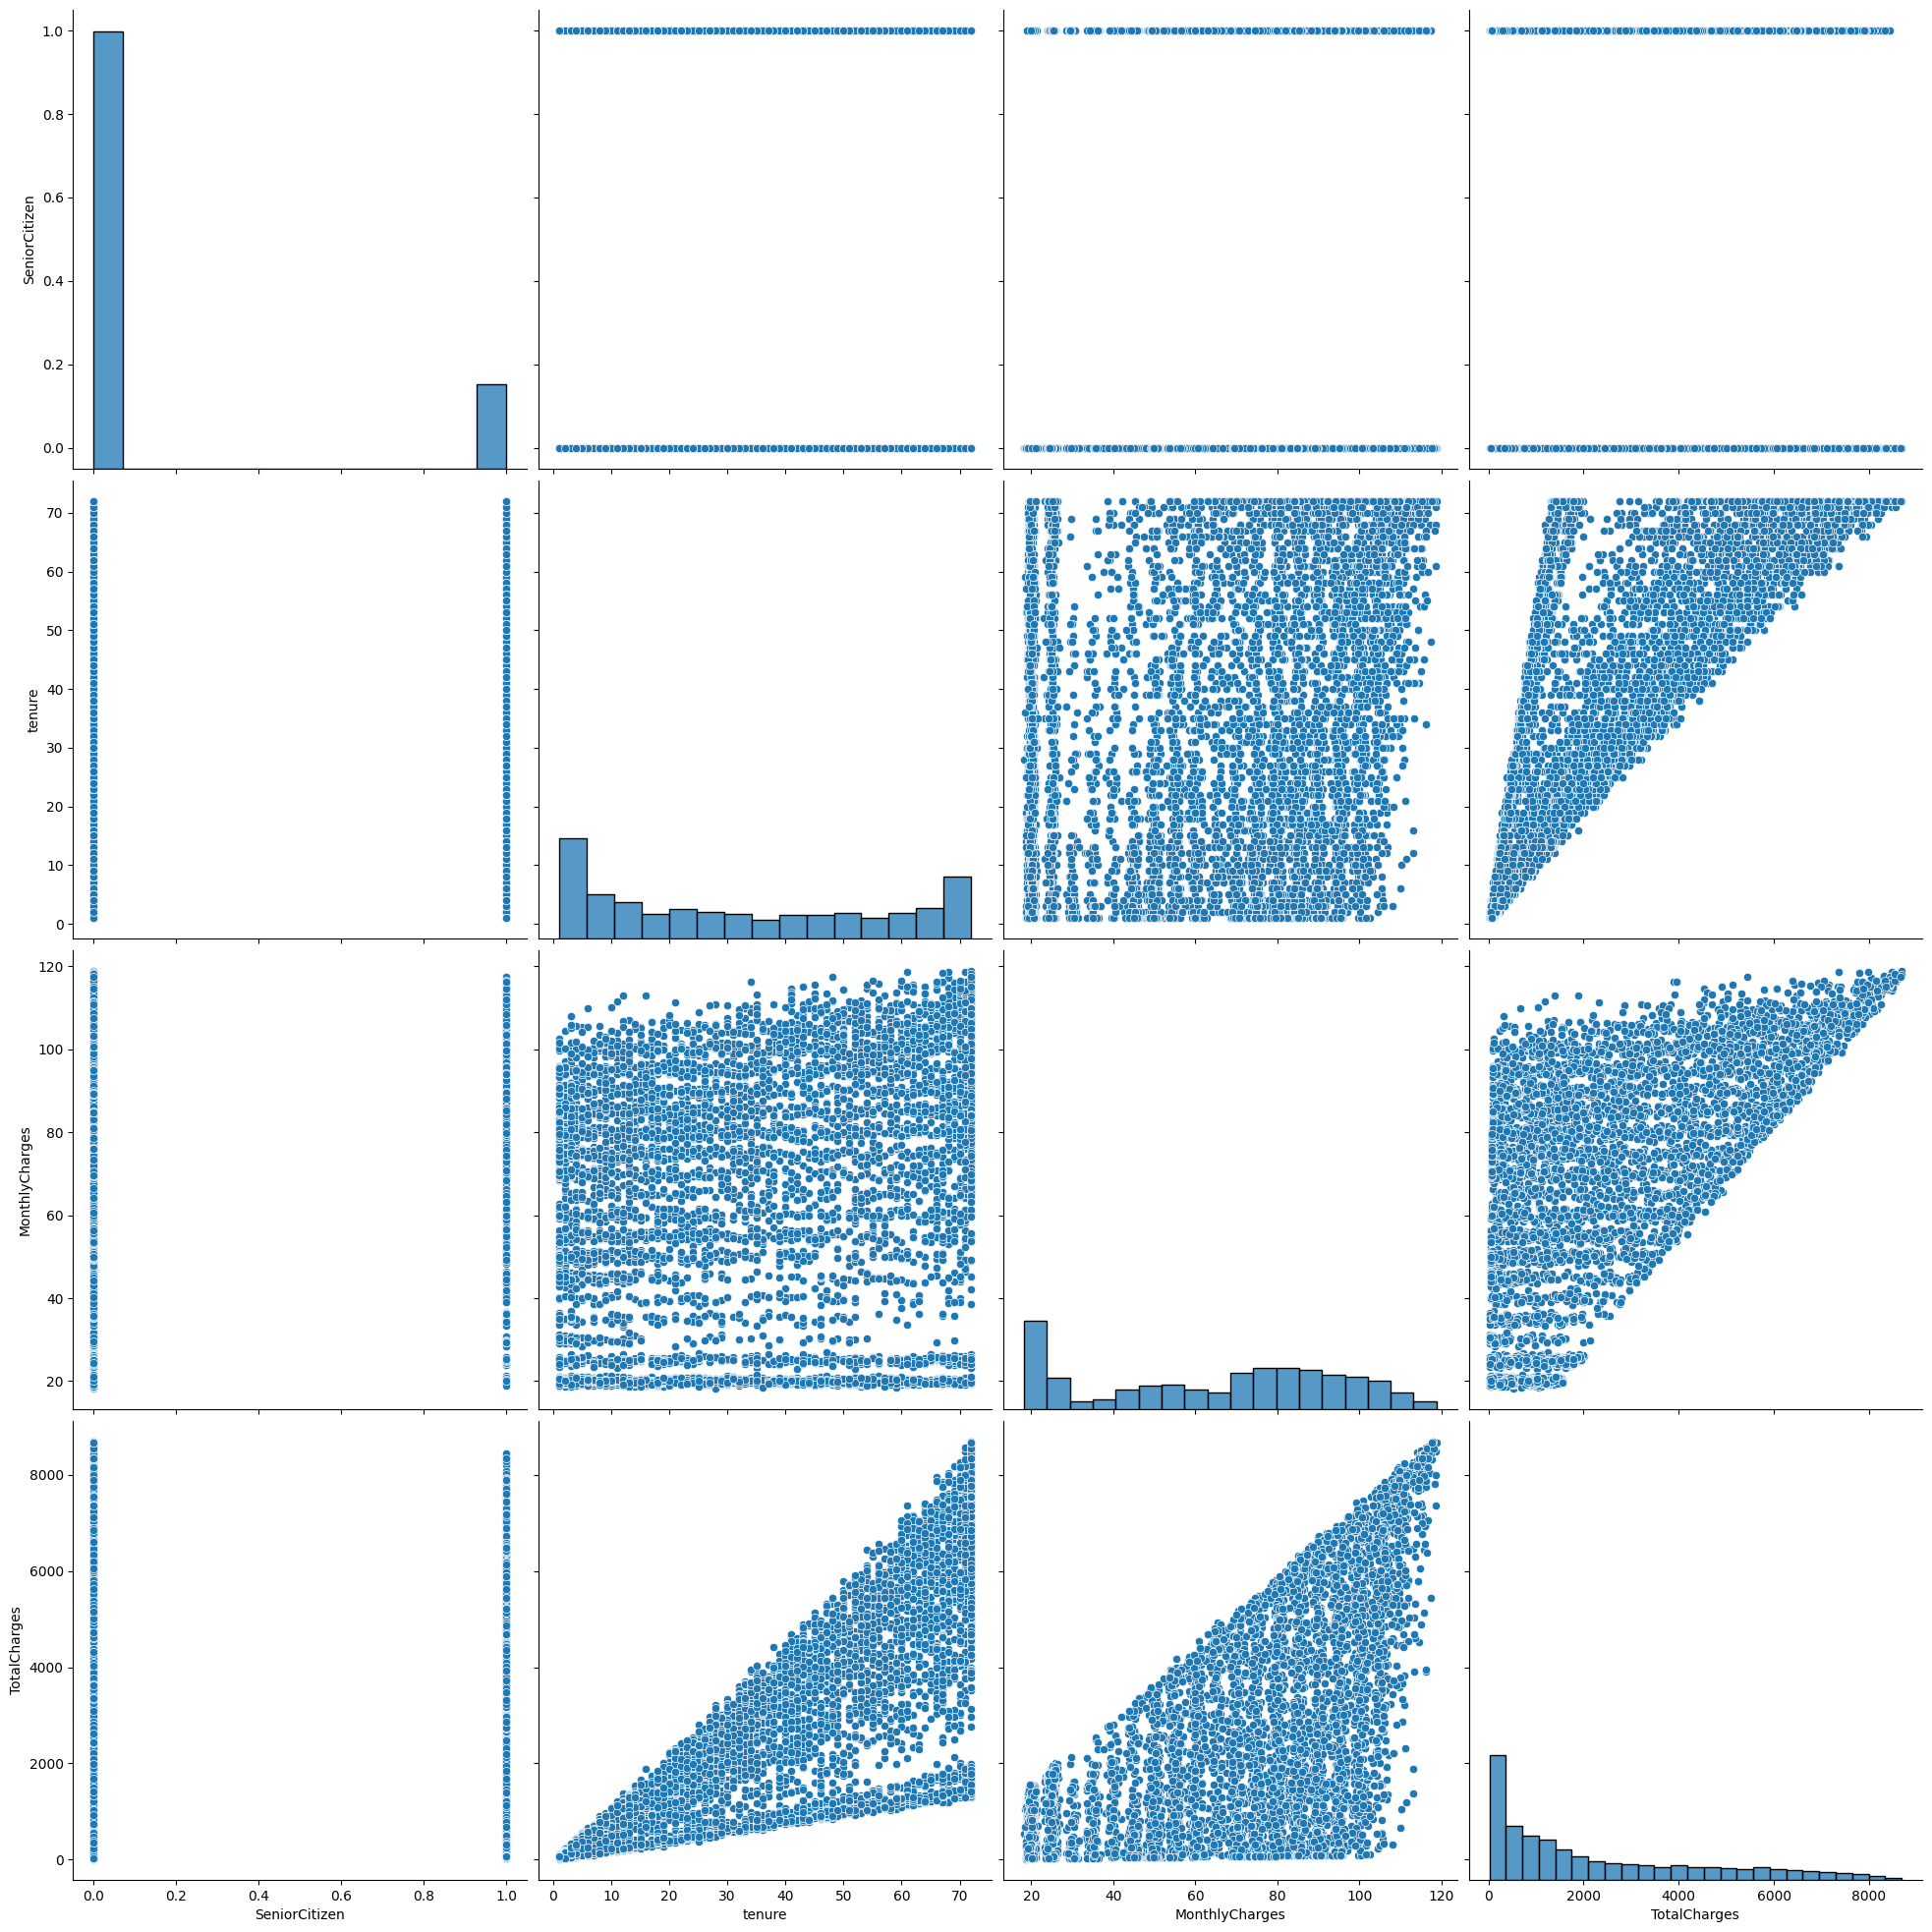

In [44]:
sns.pairplot(df_new ,size=5) 

### **1. Senior Citizen**

We want to compare the Citizen column and how it relates to our target column, i.e; 'Churn' column, see the relationships between the two and examine if we can get more interesting features from the column. 

Determine also if the column will be dropped or not

In [45]:
citizen = df_new[['SeniorCitizen', 'Churn']]

citizen.head()

SeniorCitizen Churn
0              0    No
1              0    No
2              0   Yes
3              0    No
4              0   Yes

In [46]:
citizen.nunique()

SeniorCitizen    2
Churn            2
dtype: int64

In [47]:
Citizen = pd.DataFrame (citizen.value_counts())

Citizen 

0
SeniorCitizen Churn      
0             No     4497
              Yes    1393
1             No      666
              Yes     476

In [48]:
CITIZEN = {
    'SeniorCitizen' : [ 'not a senior citizen', 'not a senior citizen', 'a senior citizen', 'a senior citizen'], 
    'Churn' : ['No', 'Yes', 'No', 'Yes'], 
    'Total' : [4497, 1393, 666, 476]
}

CITIZEN = pd.DataFrame(CITIZEN)

CITIZEN 

SeniorCitizen Churn  Total
0  not a senior citizen    No   4497
1  not a senior citizen   Yes   1393
2      a senior citizen    No    666
3      a senior citizen   Yes    476

In [49]:
import plotly.express as px
labels= {'not a senior citizen' : ['churn', 'not churn'], 'a senior citizen': ['churn', 'not churn']}
fig = px.funnel(CITIZEN, x='Total', y='SeniorCitizen', labels = labels)

fig.show()

**VISUALIZE THE PERCENTAGE**

In [50]:
citizen.shape

(7032, 2)

In [51]:
CITIZEN['Percentage'] = CITIZEN['Total']*0.014

CITIZEN

SeniorCitizen Churn  Total  Percentage
0  not a senior citizen    No   4497      62.958
1  not a senior citizen   Yes   1393      19.502
2      a senior citizen    No    666       9.324
3      a senior citizen   Yes    476       6.664

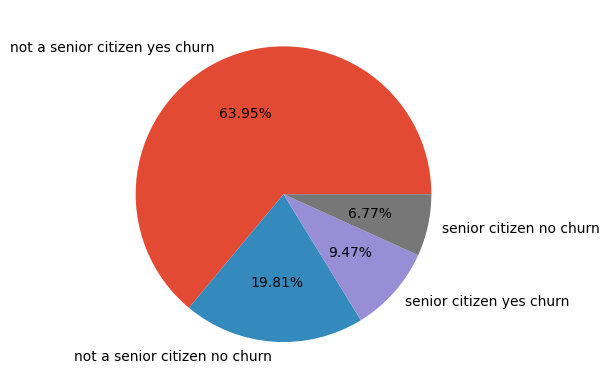

In [52]:
# create a visual for comparison of amount received in disclosed vs undisclosed 
plt.title = ('senior citizen vs non senior citizen')
labels = ['not a senior citizen yes churn','not a senior citizen no churn', 'senior citizen yes churn', 'senior citizen no churn']
amount = [4497 , 1393, 666, 476]
plt.style.use('ggplot')
plt.pie(x = amount, labels= labels , autopct = '%.2f%%' )


plt.show()

### **OBSERVATIONS**


*   Most of the customers within the company are not senior citizens , The percentage of senior to non senior is **83:17**.

*   Of the non senior citizens a **churn rate of 30%** , Which if not looked into and inestigated can be detrimental to the future of the business interms of growth and conversions. 


*   Of the senior citizens we have a **churn rate of 71%**, which is already dangerous . Since 70% of the senior citizens using the company's products readily churn.  










### **2. PARTNER**

In [53]:
partner = df_new[['Partner', 'Churn']]

partner.head()

Partner Churn
0     Yes    No
1      No    No
2      No   Yes
3      No    No
4      No   Yes

In [54]:
partner['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [55]:
k = pd.DataFrame(partner['Partner'].value_counts())
k

Partner
No      3639
Yes     3393

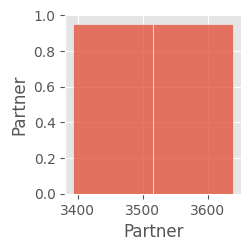

In [56]:
sns.pairplot(k)

There's not much contast on the correlation between parner and Churn rate since they are almost equally distributed. 

This column will  be dropped

In [57]:
# Drop the columns 

columns_to_drop = ['Partner']
df_new = df_new.drop(columns=columns_to_drop)

In [58]:
df_new.head()

customerID  SeniorCitizen Dependents  tenure PhoneService  \
0  7590-VHVEG              0         No       1           No   
1  5575-GNVDE              0         No      34          Yes   
2  3668-QPYBK              0         No       2          Yes   
3  7795-CFOCW              0         No      45           No   
4  9237-HQITU              0         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV        Contract PaperlessBilling  \
0               No          No          No  Month-to-month              Yes   
1              Yes          No          No        One year               No   
2               No          No          No  Month-to-month              Yes   
3              Yes         Yes          No        One year               No   
4               No          No          No  Month-to-month              Yes   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes

### **3. Dependents**

In [59]:
df_new['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [60]:
dependents =  df_new[['Dependents', 'Churn']]
dependents.head()

Dependents Churn
0         No    No
1         No    No
2         No   Yes
3         No    No
4         No   Yes

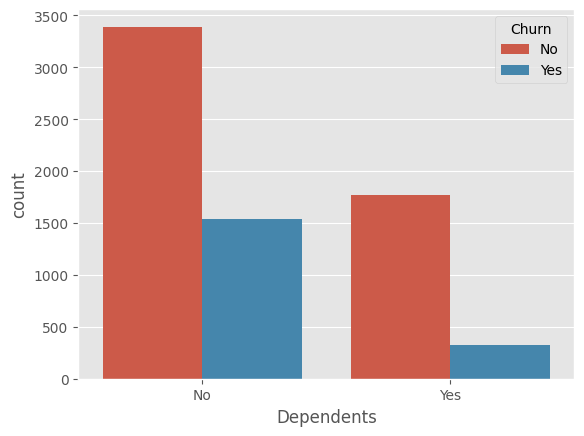

In [61]:
# Create a grouped bar plot
sns.countplot(x='Dependents', hue='Churn', data=dependents)
plt.show()

The dependents averagely affect the number/ ratio of Churn. 

**Case Study 1 - With dependents** 
The ratio of customers with dependents is relatively low as compared to the customers without dependets. 

In this Category, the huge number of customers did not churn 

**Case Study 2 - Without dependents**
Most Customers did not have dependets I.e; Without dependets column accounts for the largest ratio. 

In this Category, the huge number of customers did not churn 

**CONCLUSION**



### **4. tenure**

In [62]:
df_new['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [63]:
tenure =  df_new[['tenure', 'Churn']]

tenure.head()

tenure Churn
0       1    No
1      34    No
2       2   Yes
3      45    No
4       2   Yes

In [64]:
tenure['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [65]:
tenure['tenure'].nunique()

72

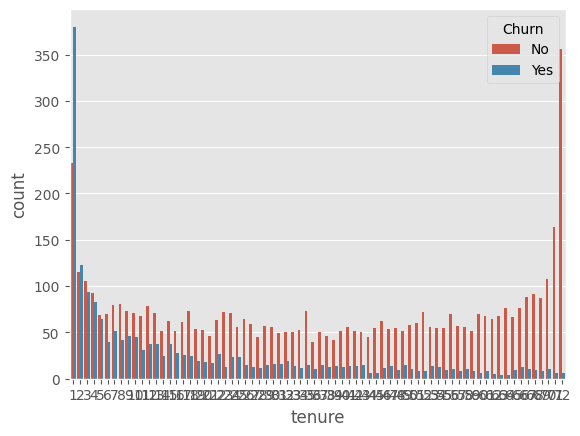

In [66]:
sns.countplot(x='tenure', hue='Churn', data=tenure)
plt.show()

**OBSERVATIONS**


*   For the tenures offered by the company, we have 72 types of tenures , I.e that is 72 different packages offered by the company
*   This tenure company does not uniquely identify a column, but describes the nature of the package the customer is on. 
*   The **longer the tenure , the more the churn rate**, and the shorter the tenure the lesser the churn rate






### **5. PhoneService**

In [67]:
df_new['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [68]:
df_new[['PhoneService', 'Churn']].head()

PhoneService Churn
0           No    No
1          Yes    No
2          Yes   Yes
3           No    No
4          Yes   Yes

In [69]:
k = df_new[['PhoneService', 'Churn']].value_counts()
k

PhoneService  Churn
Yes           No       4653
              Yes      1699
No            No        510
              Yes       170
dtype: int64

In [70]:
data = {'Churn': ['yes', 'no', 'yes', 'no'],
    'Status': ['yes phone service', 'yes phone service', 'no phone service', 'no phone service'],
    'Count': [1699, 4653, 170, 510]}
df = pd.DataFrame(data)
df

Churn             Status  Count
0   yes  yes phone service   1699
1    no  yes phone service   4653
2   yes   no phone service    170
3    no   no phone service    510

In [71]:
fig = px.bar( df , x = 'Status', y = 'Count', color='Churn', barmode = 'group')

fig.show()

In [72]:
6352/1699

3.7386698057680987

**OBSERVATIONS**

Phone service churn ratio    : (1699+4653)/1669

No Phone service churn ratio : (510+170)/170

## **6. MultipleLines**

In [73]:
df_new['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [74]:
kk = df_new[['MultipleLines' , 'Churn']].head()

kk

MultipleLines Churn
0  No phone service    No
1                No    No
2                No   Yes
3  No phone service    No
4                No   Yes

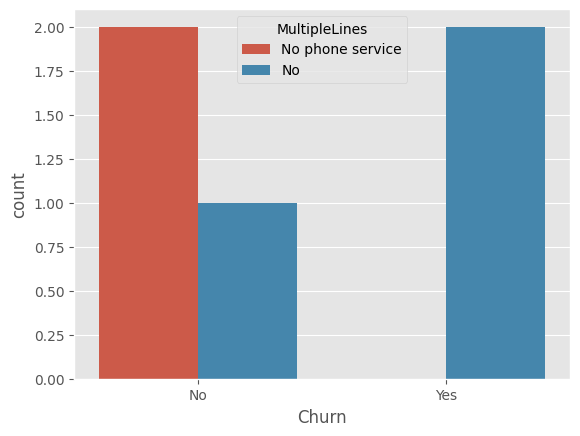

In [75]:
sns.countplot(x='Churn', hue='MultipleLines', data=kk)
plt.show()

**OBSERVATIONS**

Churn Rate

## 7. Payment Methods

In [76]:
methods = df_new[['PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn' ]]

methods

PaperlessBilling  MonthlyCharges  TotalCharges Churn
0                 Yes           29.85         29.85    No
1                  No           56.95       1889.50    No
2                 Yes           53.85        108.15   Yes
3                  No           42.30       1840.75    No
4                 Yes           70.70        151.65   Yes
...               ...             ...           ...   ...
7038              Yes           84.80       1990.50    No
7039              Yes          103.20       7362.90    No
7040              Yes           29.60        346.45    No
7041              Yes           74.40        306.60   Yes
7042              Yes          105.65       6844.50    No

[7032 rows x 4 columns]

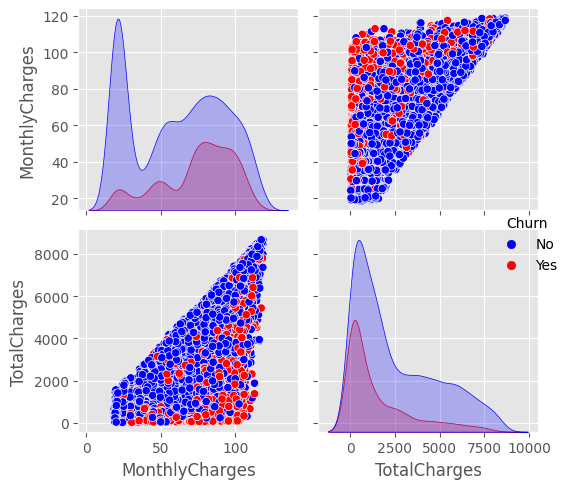

In [77]:
# Set the color palette for the 'Churn' feature
palette = {'Yes': 'red', 'No': 'blue'}

# Plot the pairplot with cthe hue set as churn
sns.pairplot(methods, hue='Churn', palette=palette)

# Adjust the plot aesthetics
plt.tight_layout()

# Display the plot
plt.show()

### **a) PaperLess Billing** 

In [78]:
paperless = df_new[['PaperlessBilling', 'Churn' ]]
paperless

PaperlessBilling Churn
0                 Yes    No
1                  No    No
2                 Yes   Yes
3                  No    No
4                 Yes   Yes
...               ...   ...
7038              Yes    No
7039              Yes    No
7040              Yes    No
7041              Yes   Yes
7042              Yes    No

[7032 rows x 2 columns]

Because both are categorical, We'll use a heatmap for comparison. 


<Axes: xlabel='Churn', ylabel='PaperlessBilling'>

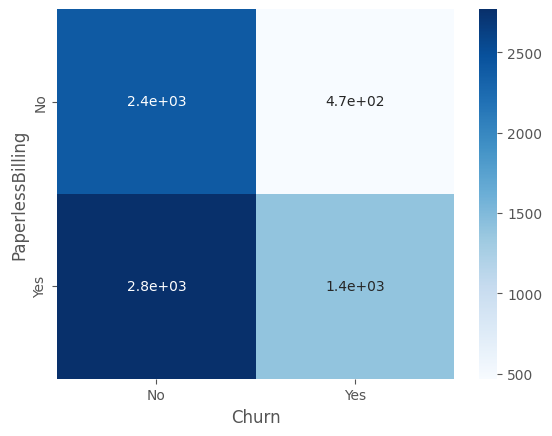

In [79]:
contingency_table = pd.crosstab(paperless['PaperlessBilling'], paperless['Churn'])

sns.heatmap(contingency_table , annot=True, cmap='Blues')

**OBSERVATIONS**


*   Ratio of paperless transactions to non paperless transactions = 7.1 : 4.2
*   PAPERLESS BILLING CHURN = 1.4 * 8.85 = 12%
 
    PAPERLESS BILLING NO CHURN = 2.8 * 8.85 = 25%

    NO PAPERLESS BILLING CHURN = 4.7 * 8.85 = 42%

    NO PAPERLESS BILLING NO CHURN = 2.4 * 8.85 = 21%

### **b) Monthly Charges**

In [80]:
charges = df_new[[ 'MonthlyCharges', 'TotalCharges', 'Churn' ]]

charges

MonthlyCharges  TotalCharges Churn
0              29.85         29.85    No
1              56.95       1889.50    No
2              53.85        108.15   Yes
3              42.30       1840.75    No
4              70.70        151.65   Yes
...              ...           ...   ...
7038           84.80       1990.50    No
7039          103.20       7362.90    No
7040           29.60        346.45    No
7041           74.40        306.60   Yes
7042          105.65       6844.50    No

[7032 rows x 3 columns]

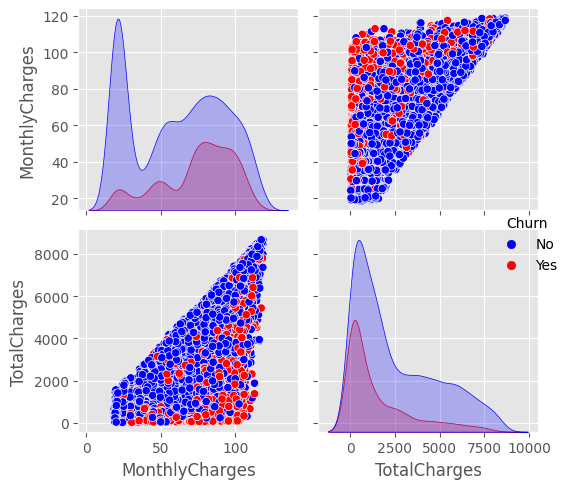

In [81]:
# Set the color palette for the 'Churn' feature
palette = {'Yes': 'red', 'No': 'blue'}

# Plot the pairplot with cthe hue set as churn
sns.pairplot(charges, hue='Churn', palette=palette)

# Adjust the plot aesthetics
plt.tight_layout()

# Display the plot
plt.show()

**OUR FINAL DATASET WITH 'UNWANTED' COLUMNS DROPPED**

In [82]:
df_new.head()


customerID  SeniorCitizen Dependents  tenure PhoneService  \
0  7590-VHVEG              0         No       1           No   
1  5575-GNVDE              0         No      34          Yes   
2  3668-QPYBK              0         No       2          Yes   
3  7795-CFOCW              0         No      45           No   
4  9237-HQITU              0         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV        Contract PaperlessBilling  \
0               No          No          No  Month-to-month              Yes   
1              Yes          No          No        One year               No   
2               No          No          No  Month-to-month              Yes   
3              Yes         Yes          No        One year               No   
4               No          No          No  Month-to-month              Yes   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes

# **BIVARIATE ANALYSIS**

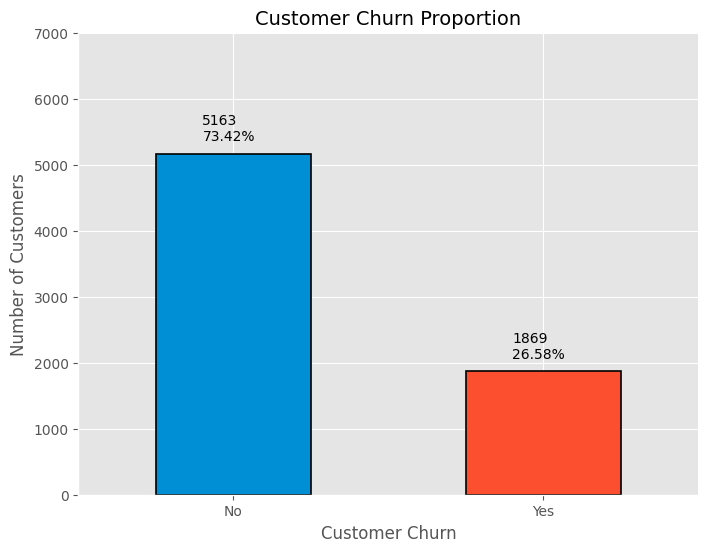

In [83]:
# Plotting the ratio of customer churn

customer_churn_counts = df_new['Churn'].value_counts()
labels = ['No', 'Yes']
colors = ['#008fd5', '#fc4f30']
explode = (0.03, 0.03)

percentages = round(customer_churn_counts/customer_churn_counts.sum()*100, 2).astype(str) + '%'

ax = customer_churn_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Customer Churn Proportion', fontsize=14)
ax.set_xlabel('Customer Churn', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 7000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


We have seen that since the target column is 'unbalanced', then we will have to apply SMOTE on our last ML phase to ensure our predictions are not inclined to the target variable is inclined to.

### Check the distribution of the internet service users consuption 

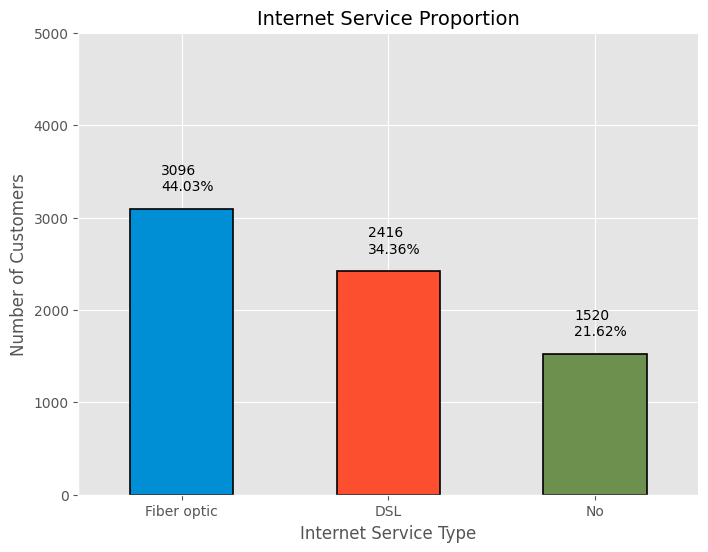

In [84]:
# Plotting the proportion of Internet Service Users

internet_service_counts = df_new['InternetService'].value_counts()
labels = ['DSL', 'Fiber optic', 'No']
colors = ['#008fd5', '#fc4f30','#6d904f']
explode = (0.03, 0.03, 0.1)

percentages = round(internet_service_counts/internet_service_counts.sum()*100, 2).astype(str) + '%'

ax = internet_service_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Internet Service Proportion', fontsize=14)
ax.set_xlabel('Internet Service Type', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 5000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


### Distribution of Multiple Line users 

**Multiple Lines**

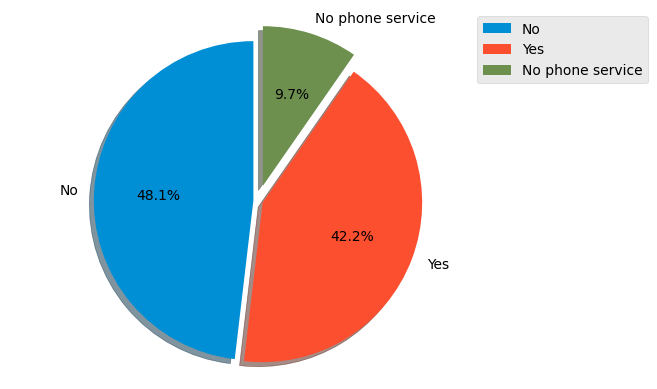

In [85]:
#Plotting the proportion of multiple lines

multiple_lines_counts = df_new['MultipleLines'].value_counts()
labels = ['No', 'Yes', 'No phone service']
colors = ['#008fd5', '#fc4f30', '#6d904f']
explode = (0.03, 0.03, 0.1)
plt.pie(multiple_lines_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
#plt.title('Multiple Lines Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()

# MULTIVARIATE ANALYSIS

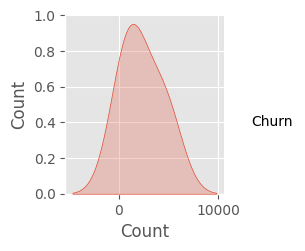

In [86]:
# Select the particular column for comparison
target_column = 'Churn'

# Concatenate the target column with other columns
df_concat = pd.concat([df_new[target_column], df.drop(columns=target_column)], axis=1)

# Create a scatter plot matrix (pair plot)
sns.pairplot(df_concat, hue=target_column)
#plt.title('Pair Plot')
plt.show()

**QUESTIONS AND ANSWERS**

**_Hypothesis_**

*__Null:__*
_Customers churn as a result of paying  high charges._

*__Alternate:__*
Customers who pay high charges do not churn.


**_Questions_**
1. How much do senior citizens and non-senior citizens pays on a monthly basis?

2. How much is generated from customers with internet service?

3. What is the ratio of customers and their type contracts?

4. What categories of contracts generate the most revenue?

5. Do high paying customers use Stream TV or/and Stream movies?

6. Do non-senior citizens have multiple lines?

7. Do customers with dependents spend more than customers without dependents?

8. What payment methods do customers prefer/use more?

#### **Questions 1**

### **How much do senior citizens and non-senior citizens pays on a monthly basis?**

In [87]:
df_new.head(0)

Empty DataFrame
Columns: [customerID, SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

In [88]:
cit = df_new[['MonthlyCharges', 'SeniorCitizen']]

cit.head()

MonthlyCharges  SeniorCitizen
0           29.85              0
1           56.95              0
2           53.85              0
3           42.30              0
4           70.70              0

In [89]:
charges_churn_yes = cit.loc[cit['SeniorCitizen']=='0']
charges_churn_not = cit.loc[cit['SeniorCitizen']=='1']
charges_churn_not

Empty DataFrame
Columns: [MonthlyCharges, SeniorCitizen]
Index: []

In [90]:
charges_churn_yes.shape , charges_churn_not.shape

((0, 2), (0, 2))

In [91]:
print ('monthly charges for customers that did churn ', charges_churn_yes['MonthlyCharges'].sum())
print ('monthly charges for customers that did not churn ', charges_churn_not['MonthlyCharges'].sum())

monthly charges for customers that did churn  0.0
monthly charges for customers that did not churn  0.0


In [92]:
# Visualization

In [93]:
x = ['senior citizens monthly', 'non senior citizens monthly']
y = [charges_churn_yes['MonthlyCharges'].sum(), charges_churn_not['MonthlyCharges'].sum()]



fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'senior citizen',
    y = ["senior citizens monthly"],
    x = [charges_churn_yes['MonthlyCharges'].sum()],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'non senior citizen',
    orientation = "h",
    y = ["non senior citizens monthly"],
    x = [charges_churn_not['MonthlyCharges'].sum()],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.show()

Get Average

In [94]:
Churn = 316530.15/5163
Churn_not = 139130.85/1869

print (Churn, Churn_not)

61.307408483439865 74.44133226324237


## **Question 2**

### **2. How much is generated from customers with internet service?  (MONTHLY)**



What payment methods do customers prefer/use more?

In [95]:
df.head(0)

Empty DataFrame
Columns: [Churn, Status, Count]
Index: []

### **a) Visualize the distribution w.r.t churn**

In [98]:
df_new.head(0)

Empty DataFrame
Columns: [customerID, SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

In [101]:
df = df_new[['InternetService', 'MonthlyCharges', 'Churn'] ]

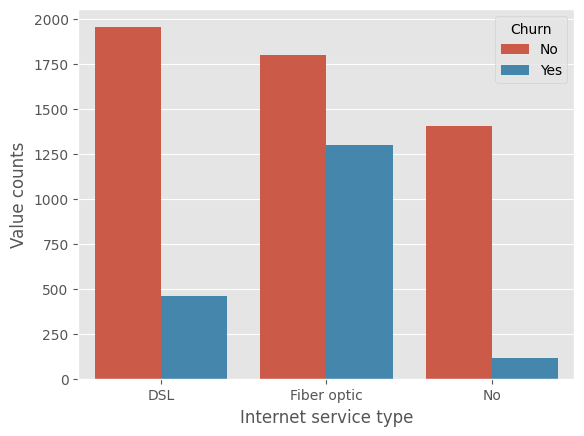

In [104]:
sns.countplot(data = df, x = 'InternetService', hue='Churn')
#plt.title("Internet type VS churn")
plt.xlabel('Internet service type')
plt.ylabel('Value counts')
plt.show()

**OBSERVATIONS**

FibreOptic Churn rate - Has a high churn rate , to mean that most customers using fibre optic internet opt out of vodaphone services

DSL Churn Rate 

No internet service - Has the lowest churn rate, however herein is also the least number of people

**b) Get the monthly charges distribution of each internet service type**

In [107]:
# Getting unique columns with internet services

In [108]:
DSL_charges = df.loc[df['InternetService']=='DSL']
fibre_charges = df.loc[df['InternetService']=='Fiber optic']
no_internet_charges = df.loc[df['InternetService']=='No']

In [109]:
print ( 'DSL internet monthly Charges', DSL_charges['MonthlyCharges'].sum(), '$')
print ( 'Fibre  internet monthly Charges', fibre_charges['MonthlyCharges'].sum(), '$')
print ( 'no internet internet monthly Charges', no_internet_charges['MonthlyCharges'].sum(), '$')

DSL internet monthly Charges 140340.65000000002 $
Fibre  internet monthly Charges 283284.4 $
no internet internet monthly Charges 32035.949999999997 $


In [110]:
# investigate on how to use a for loop for the below code

In [111]:
DSL_charges_churn = DSL_charges.loc[DSL_charges['Churn']=='No']
DSL_charges_churn_not = DSL_charges.loc[DSL_charges['Churn']=='Yes']

fibre_charges_churn = fibre_charges.loc[fibre_charges['Churn']=='No']
fibre_charges_churn_not = fibre_charges.loc[fibre_charges['Churn']=='Yes']


no_internet_charges_churn = no_internet_charges.loc[no_internet_charges['Churn']=='No']
no_internet_charges_churn_not = no_internet_charges.loc[no_internet_charges['Churn']=='Yes']

In [112]:
# pass into a dict then into a df

dict1 = pd.DataFrame ([['DSL churn', DSL_charges_churn['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict2 = pd.DataFrame ([['DSL no churn', DSL_charges_churn_not['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict3 = pd.DataFrame ([['fibre churn', fibre_charges_churn['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict4 = pd.DataFrame ([['fibre no churn', fibre_charges_churn_not['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict5 = pd.DataFrame ([['no_internet_charges_churn', no_internet_charges_churn['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict6 = pd.DataFrame ([['no_internet_charges_churn', no_internet_charges_churn_not['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])

In [113]:
DICT = [dict1, dict2, dict3, dict4, dict5, dict6]

DICT = pd.concat(DICT, ignore_index=True)

DICT

type of internet  monthly charges
0                  DSL churn        117811.45
1               DSL no churn         22529.20
2                fibre churn        168984.35
3             fibre no churn        114300.05
4  no_internet_charges_churn         29734.35
5  no_internet_charges_churn          2301.60

In [114]:
fig = px.funnel(DICT , x='monthly charges', y='type of internet')
fig.show()

### **Question 3**

**3. What is the ratio of customers and their type contracts?**



In [119]:
df_new.head(0)

Empty DataFrame
Columns: [customerID, SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

In [120]:
contract = pd.DataFrame (df_new[['Contract', 'SeniorCitizen']])

In [121]:
contract_year = contract.loc[contract['Contract'] == 'One year']
contract_month = contract.loc[contract['Contract'] == 'Month-to-month']
contract_2_year = contract.loc[contract['Contract'] == 'Two year']

In [122]:
list1 = [contract_year.value_counts(), contract_month.value_counts(), contract_2_year.value_counts() ]

In [123]:
a = pd.DataFrame(contract_year.value_counts())
b = pd.DataFrame (contract_month.value_counts())
c = pd.DataFrame (contract_2_year.value_counts())

In [124]:
a


0
Contract SeniorCitizen      
One year 0              1282
         1               190

In [125]:
b

0
Contract       SeniorCitizen      
Month-to-month 0              3068
               1               807

In [126]:
c

0
Contract SeniorCitizen      
Two year 0              1540
         1               145

In [127]:
data = {'Contract': ['one year', 'one year', 'month', 'month', '2 year', '2 year'],
        'Senior Citizen': ['yes', 'no','yes', 'no','yes', 'no'],
        'frequency': [190, 1282, 807, 3068, 145, 1540]}
dfpl = pd.DataFrame(data)
dfpl

Contract Senior Citizen  frequency
0  one year            yes        190
1  one year             no       1282
2     month            yes        807
3     month             no       3068
4    2 year            yes        145
5    2 year             no       1540

In [128]:
fig = px.bar( dfpl, x = 'Senior Citizen', y = 'frequency', color='Contract', barmode = 'group')

fig.show()

### **Question 4**

**4. What categories of contracts generate the most revenue?**



In [129]:
df.head(2)

InternetService  MonthlyCharges Churn
0             DSL           29.85    No
1             DSL           56.95    No

In [131]:
contract_year = df.loc[df_new['Contract'] == 'One year']
contract_month = df.loc[df_new['Contract'] == 'Month-to-month']
contract_2_year = df.loc[df_new['Contract'] == 'Two year']

In [132]:
print ( 'yearly contract sum', contract_year['MonthlyCharges'].sum())
print ( 'monthly contract sum', contract_month['MonthlyCharges'].sum())
print( '2 yearly contract sum', contract_2_year['MonthlyCharges'].sum())

yearly contract sum 95796.9
monthly contract sum 257294.15000000002
2 yearly contract sum 102569.95


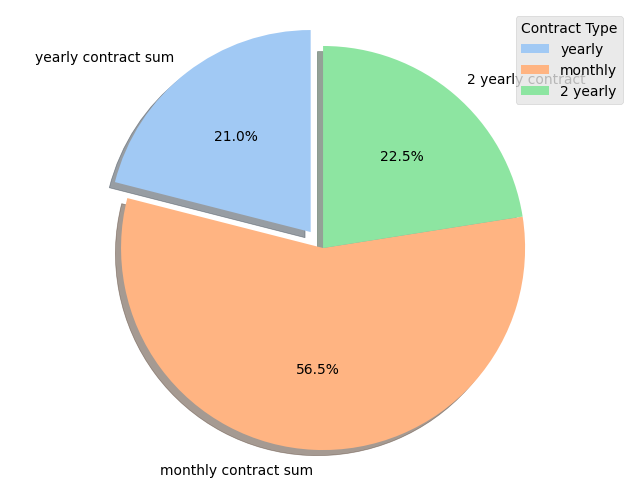

In [133]:
x = ['yearly', 'monthly', '2 yearly']
y = [95796, 257294, 102569]
labels = ['yearly contract sum', 'monthly contract sum', '2 yearly contract']

# Create pie chart
plt.figure(figsize=(8, 6))
explode = (0.1, 0, 0)  # Explode the first slice

# Create pie chart with custom colors and explode
colors = sns.color_palette('pastel')[0:len(x)]
plt.pie(y, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)

# Add title and legend
#plt.title('Contract Sums percentage of total')
plt.legend(x, title='Contract Type', loc='upper right')

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

### **Question 5**

**5. Do customers with dependents spend more than customers without dependents?**



In [136]:
df_new.head(0)

Empty DataFrame
Columns: [customerID, SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

In [137]:
df_new['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [139]:
depend = df_new.loc[df_new['Dependents']== 'No']
depend_not = df_new.loc[df_new['Dependents']== 'Yes']

print ( 'monthly charges without dependent' , depend['MonthlyCharges'].sum())
print ( 'monthly charges with dependent' ,depend_not['MonthlyCharges'].sum())

monthly charges without dependent 330524.85
monthly charges with dependent 125136.15


<BarContainer object of 2 artists>

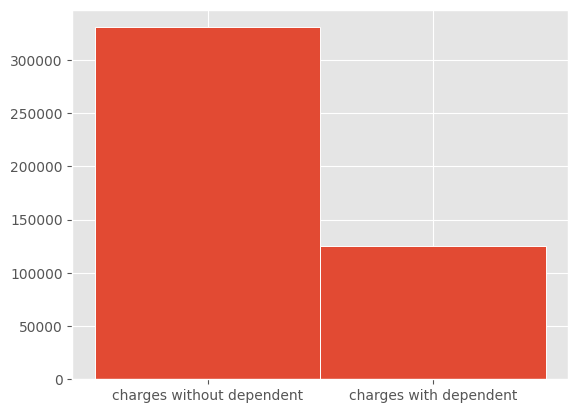

In [140]:
x = [depend['MonthlyCharges'].sum(), depend_not['MonthlyCharges'].sum()]
y = ['charges without dependent', 'charges with dependent']

fig, ax = plt.subplots()

ax.bar(y, x, width=1, edgecolor="white", linewidth=0.7)

Examine the churn ratio

In [141]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [142]:
depend.head(1)

customerID  SeniorCitizen Dependents  tenure PhoneService  \
0  7590-VHVEG              0         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV        Contract PaperlessBilling  \
0               No          No          No  Month-to-month              Yes   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No

In [143]:
# Get unique column
depend_yes_churn = depend.loc[depend['Churn'] == 'Yes']
depend_no_churn = depend.loc[depend['Churn'] == 'No']

not_depend_yes_churn = depend_not.loc[depend_not['Churn'] == 'Yes']
not_depend_no_churn = depend_not.loc[depend_not['Churn'] == 'No']

# Get the summation of the amount 
a = depend_yes_churn['MonthlyCharges'].sum()
b = depend_no_churn['MonthlyCharges'].sum()
c = not_depend_yes_churn['MonthlyCharges'].sum()
d = not_depend_no_churn['MonthlyCharges'].sum()

# Get percentage of total monthly charges 
e = a + b +c +d

f = (a/e) * 100
g = (b/e) * 100
h = (c/e) * 100
i = (d/e) * 100



In [144]:

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Has dependent and churned',
    y = ["Monthly amount", "Percentage"],
    x = [ a , f,],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Has dependent did not churn',
    orientation = "h",
    y = ["Monthly amount", "Percentage"],
    x = [b, g],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'No dependent and churned',
    orientation = "h",
    y = ["Monthly amount", "Percentage"],
    x = [c , h],
    textposition = "outside",
    textinfo = "value+percent total"))

fig.add_trace(go.Funnel(
    name = 'No dependent and did churned',
    orientation = "h",
    y = ["Monthly amount", "Percentage"],
    x = [d , i],
    textposition = "outside",
    textinfo = "value+percent total"))

fig.show()


### **Question 6**

**6. What payment methods do customers prefer/use more?**

In [145]:
df.head(1)

InternetService  MonthlyCharges Churn
0             DSL           29.85    No

In [146]:
df_.head(1)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  

[1 rows x 21 columns]

In [147]:
df_['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

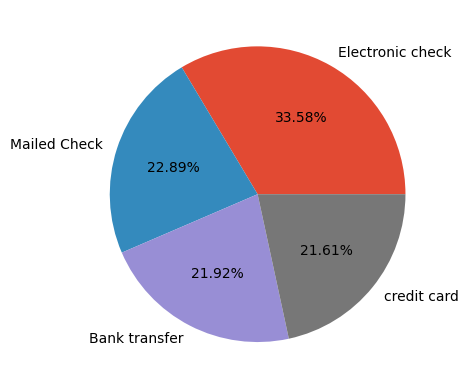

In [148]:
x = [2365, 1612, 1544, 1522]
y = ['Electronic check', 'Mailed Check', 'Bank transfer', 'credit card']


plt.title = ('Payment methods preferences')
labels = y
amount = x
plt.style.use('ggplot')
plt.pie(x = amount, labels= labels , autopct = '%.2f%%' )


plt.show()

# **FEATURE ENGINEERING**

In [149]:
df_.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

**Numerical Features** - We **scale** the numerical columns



*   Avoiding attribute dominance/Outliers handling


**Categorical Features** - We perform a **Encoding** I.e label encoding of OneHotEncoding to this columns



### **GET THE NUMERICAL AND CATEGORICAL FEATURES**

In [150]:
df_new.head(0)

Empty DataFrame
Columns: [customerID, SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

In [151]:
#Further  Drop CustomerID not to be used in modelling 

df_new_ = df_new.drop('customerID', axis=1)

df_new_.head(0)

Empty DataFrame
Columns: [SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

In [152]:
# Get the original column names and store in a variables

original_columns = df_new_.columns.tolist()

original_columns


['SeniorCitizen',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [153]:
df_new_.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Dependents        7032 non-null   object 
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   object 
 4   MultipleLines     7032 non-null   object 
 5   InternetService   7032 non-null   object 
 6   OnlineSecurity    7032 non-null   object 
 7   OnlineBackup      7032 non-null   object 
 8   DeviceProtection  7032 non-null   object 
 9   TechSupport       7032 non-null   object 
 10  StreamingTV       7032 non-null   object 
 11  Contract          7032 non-null   object 
 12  PaperlessBilling  7032 non-null   object 
 13  MonthlyCharges    7032 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7032 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [154]:
# Get the list of all the columns 
column_list = list(df_new_.columns)



In [155]:
# Numerical columns 

#numeric_cols = df_new_[column_list].select_dtypes(include=np.number).columns.tolist()

numeric_cols = pd.DataFrame (df_new_[column_list].select_dtypes(include=np.number).columns.tolist())

numeric_cols.head()

0
0   SeniorCitizen
1          tenure
2  MonthlyCharges
3    TotalCharges

In [156]:
# Categorical columns


categorical_cols = pd.DataFrame (df_new_[column_list].select_dtypes(exclude=np.number).columns.tolist())

categorical_cols.head()

0
0       Dependents
1     PhoneService
2    MultipleLines
3  InternetService
4   OnlineSecurity

**a) Scale Numerical features**

In [157]:
# Create an instance of that class
scaler = StandardScaler()

In [158]:
numeric_cols.T

0       1               2             3
0  SeniorCitizen  tenure  MonthlyCharges  TotalCharges

In [159]:
num_cols = [ 'SeniorCitizen' , 'MonthlyCharges', 'TotalCharges']

In [160]:
df_ready = df_new_[num_cols]

df_ready.head()

SeniorCitizen  MonthlyCharges  TotalCharges
0              0           29.85         29.85
1              0           56.95       1889.50
2              0           53.85        108.15
3              0           42.30       1840.75
4              0           70.70        151.65

In [161]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7032 non-null   int64  
 1   MonthlyCharges  7032 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 477.8 KB


In [162]:
df_ready_ = scaler.fit_transform(df_ready)

df_ready_

array([[-0.44032709, -1.16169394, -0.99419409],
       [-0.44032709, -0.26087792, -0.17373982],
       [-0.44032709, -0.36392329, -0.95964911],
       ...,
       [-0.44032709, -1.17000405, -0.85451414],
       [ 2.27103902,  0.31916782, -0.87209546],
       [-0.44032709,  1.35793167,  2.01234407]])

In [163]:
# Get a copy of the scaled numeric data

scaled_numeric = df_ready_.copy()

In [164]:
pd.DataFrame(df_ready_).head()

0         1         2
0 -0.440327 -1.161694 -0.994194
1 -0.440327 -0.260878 -0.173740
2 -0.440327 -0.363923 -0.959649
3 -0.440327 -0.747850 -0.195248
4 -0.440327  0.196178 -0.940457

In [165]:
#df_new_ = scaler.fit_transform(num_cols)

#df_new_ ['numeric_cols']= pd.DataFrame(scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

**b) Encoding categoricaal cols**

In [166]:
encoder = OneHotEncoder(sparse=False)

In [167]:
categorical_cols.T

0             1              2                3               4   \
0  Dependents  PhoneService  MultipleLines  InternetService  OnlineSecurity   

             5                 6            7            8         9   \
0  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  Contract   

                 10     11  
0  PaperlessBilling  Churn

In [168]:
cat_cals = ['Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling']

In [169]:
# 'Drop' churn column

In [170]:
df_encoded = pd.DataFrame(encoder.fit_transform(df_new_[cat_cals]))

#df_encoded = encoder.get_feature_names(cat_cals)

df_encoded.head()
                                                


0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
3  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  1.0  0.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   

    24   25   26   27   28   29  
0  0.0  1.0  0.0  0.0  0.0  1.0  
1  0.0  0.0  1.0  0.0  1.0  0.0  
2  0.0  1.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  1.0  0.0  1.0  0.0  
4  0.0  1.0  0.0  0.0  0.0  1.0  

[5 rows x 30 columns]

In [171]:
# Create a copy 

encoded_categorical = df_encoded.copy()

**c) Replace categorical data with encoded team**

In [172]:
# 
df_ready_ = pd.DataFrame (df_ready_)

In [173]:
df_ready_.head()

0         1         2
0 -0.440327 -1.161694 -0.994194
1 -0.440327 -0.260878 -0.173740
2 -0.440327 -0.363923 -0.959649
3 -0.440327 -0.747850 -0.195248
4 -0.440327  0.196178 -0.940457

In [174]:
# Drop the categorical columns 
df_ready_ =df_ready_.drop(categorical_cols, axis = 1)

a = pd.DataFrame (encoded_categorical)
b = pd.DataFrame (scaled_numeric)

# Replace the dropped cat columns with the encoded cat columns
df_ready_ = pd.concat([a, b], axis=1)

In [175]:
a.shape, b.shape, df_new.shape

((7032, 30), (7032, 3), (7032, 17))

### **c) Encode our Target Feature (Manually)**

In [176]:
df_new['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [177]:
le = LabelEncoder()

target = df_new['Churn'].values.reshape(-1, 1)
target_encoded = le.fit_transform(target)

target_encoded

array([0, 0, 1, ..., 0, 1, 0])

In [178]:
churn = target_encoded.copy()

In [179]:
pd.DataFrame(churn).head()

0
0  0
1  0
2  1
3  0
4  1

### **COMBINED DATASET** 

In [180]:
df_ready_ = pd.concat([a, b, pd.DataFrame(churn, columns=['churn'])], axis=1)

df_ready_

0    1    2    3    4    5    6    7    8    9  ...   24   25   26  \
0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
1     1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
2     1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
3     1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
4     1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7027  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   
7028  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  0.0  1.0   
7029  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
7030  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
7031  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   

       27   28   29         0         1         2  churn  
0     0.0  0.0  1.0 -0.440327 -1.161694 -0.994194      0  
1     0.0  1.0  0.0 -0.440327 -0.260878 -0.173740      0  
2     0.0  0.0  1.0 -0.440327 -0.363923 -0.959649      1  
3     0.0  1.0  0.0 -0.440327 -0.747850 -0.195248      0  
4     0.0  0.0  1.0 -0.440327  0.196178 -0.940457      1  
...   ...  ...  ...       ...       ...       ...    ...  
7027  0.0  0.0  1.0 -0.440327  0.664868 -0.129180      0  
7028  0.0  0.0  1.0 -0.440327  1.276493  2.241056      0  
7029  0.0  0.0  1.0 -0.440327 -1.170004 -0.854514      0  
7030  0.0  0.0  1.0  2.271039  0.319168 -0.872095      1  
7031  1.0  0.0  1.0 -0.440327  1.357932  2.012344      0  

[7032 rows x 34 columns]

In [181]:
df_ready_.isna().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
0        0
1        0
2        0
churn    0
dtype: int64

In [182]:
df_ready_

0    1    2    3    4    5    6    7    8    9  ...   24   25   26  \
0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
1     1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
2     1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
3     1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
4     1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7027  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   
7028  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  0.0  1.0   
7029  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
7030  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
7031  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   

       27   28   29         0         1         2  churn  
0     0.0  0.0  1.0 -0.440327 -1.161694 -0.994194      0  
1     0.0  1.0  0.0 -0.440327 -0.260878 -0.173740      0  
2     0.0  0.0  1.0 -0.440327 -0.363923 -0.959649      1  
3     0.0  1.0  0.0 -0.440327 -0.747850 -0.195248      0  
4     0.0  0.0  1.0 -0.440327  0.196178 -0.940457      1  
...   ...  ...  ...       ...       ...       ...    ...  
7027  0.0  0.0  1.0 -0.440327  0.664868 -0.129180      0  
7028  0.0  0.0  1.0 -0.440327  1.276493  2.241056      0  
7029  0.0  0.0  1.0 -0.440327 -1.170004 -0.854514      0  
7030  0.0  0.0  1.0  2.271039  0.319168 -0.872095      1  
7031  1.0  0.0  1.0 -0.440327  1.357932  2.012344      0  

[7032 rows x 34 columns]

## **DATA SPLITTING**

In [183]:
X = df_ready_.drop(['churn'], axis=1)  # these are the features to learn from 

y = df_ready_['churn'] # these is our target feature 

In [184]:
# See tyhe features 

X.head()

0    1    2    3    4    5    6    7    8    9   ...   23   24   25   26  \
0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
3  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   

    27   28   29        0         1         2   
0  0.0  0.0  1.0 -0.440327 -1.161694 -0.994194  
1  0.0  1.0  0.0 -0.440327 -0.260878 -0.173740  
2  0.0  0.0  1.0 -0.440327 -0.363923 -0.959649  
3  0.0  1.0  0.0 -0.440327 -0.747850 -0.195248  
4  0.0  0.0  1.0 -0.440327  0.196178 -0.940457  

[5 rows x 33 columns]

In [185]:
# See the target

y.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

**It is important to note that after scaling / encoding our features before splitting then our target (y) and features (x) are already encoded** 

In [186]:
# Splitting our dataset with a ratio of 80:20

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) # stratify specified to y

In [187]:
X_train.shape, X_eval.shape,  y_train.shape , y_eval.shape

((5625, 33), (1407, 33), (5625,), (1407,))

In [188]:
X_train.head(2)

0    1    2    3    4    5    6    7    8    9   ...   23   24   25  \
3780  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0   
1588  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  1.0   

       26   27   28   29        0         1         2   
3780  0.0  0.0  0.0  1.0 -0.440327  0.364042 -0.156313  
1588  0.0  0.0  1.0  0.0 -0.440327 -1.527339 -0.970216  

[2 rows x 33 columns]

In [189]:
X_eval.head(2)

0    1    2    3    4    5    6    7    8    9   ...   23   24   25  \
5126  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0   
2423  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  1.0   

       26   27   28   29        0         1         2   
5126  0.0  0.0  0.0  1.0  2.271039  0.511962 -0.470328  
2423  0.0  0.0  0.0  1.0 -0.440327  1.145193  0.659068  

[2 rows x 33 columns]

In [190]:
y_train[:5]

3780    0
1588    0
2927    0
198     0
4504    0
Name: churn, dtype: int64

# **MODEL BUILDING AND MODEL SELECTION**

**MODELS TO TEST BEFORE SELECTION**

1. SVM Linear
2. K-Nearest Neighbors (KNN)
3. Logistic Regression
4. SVM non Linear
5.  Random Forest
6. Decision Trees
7. Gradient Boosting


### **MODEL 1 - RANDOM FOREST**

Create an instance and set the number of estimators to be 100

In [191]:
# Create the Random Forest classifier instance with 100 estimators 
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

Train Model 

In [192]:
# Train the classifier on the training data
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make predictions

In [193]:
# Use the trained classifier to make predictions on the test data
y_pred = model1.predict(X_eval)

Evaluating the model 

In [194]:
# Calculate the accuracy of the model
acc = metrics.accuracy_score(y_eval, y_pred)
prec = metrics.precision_score(y_eval, y_pred)
rec = metrics.recall_score(y_eval, y_pred)
f1 = metrics.f1_score(y_eval, y_pred)

In [195]:
print ('accuracy :', acc)
print ('precision :', prec)
print ('rec :', rec)
print ('f1 :', f1)

accuracy : 0.7789623312011372
precision : 0.6120996441281139
rec : 0.45989304812834225
f1 : 0.5251908396946564


In [196]:
# Print the classification Report 
print ( metrics.classification_report (y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



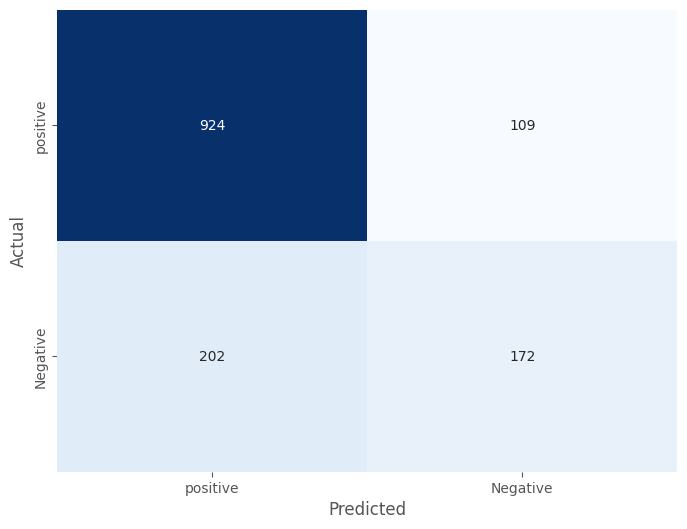

In [197]:
# visualize the metrics 
cm = confusion_matrix(y_eval, y_pred)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [198]:
metrics1 = pd.DataFrame( [['Random Forest', acc,prec, rec, f1 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

In [199]:
metrics1

Model  accuracy  precision     recal        f1
0  Random Forest  0.778962     0.6121  0.459893  0.525191

# **MODEL 2 : GRADIENT BOOSTING**

Create an instance , set 100 estimators

In [200]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

**Train our GB**

In [201]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

**Make Predictions using the GBoost**

In [202]:
y_pred = gb.predict(X_eval)

In [203]:
y_pred =pd.DataFrame( y_pred)

y_pred.head(2)

0
0  1
1  0

**Evaluate the predictions made**

In [204]:
y_pred.shape

(1407, 1)

In [205]:
y_pred.head(2)

0
0  1
1  0

In [207]:
# Calculate the accuracy of the model

acc2 = metrics.accuracy_score(y_eval, y_pred)
prec2 = metrics.precision_score(y_eval, y_pred)
rec2 = metrics.recall_score(y_eval, y_pred)
f12 = metrics.f1_score(y_eval, y_pred)


In [208]:
print ('accuracy model 2 :', acc2)
print ('precision model 2:', prec2)
print ('rec model 2:', rec2)
print ('f1 model 2:', f12)



accuracy model 2 : 0.8052594171997157
precision model 2: 0.676056338028169
rec model 2: 0.5133689839572193
f1 model 2: 0.5835866261398177


In [209]:

# Print the classification Report 

print ( metrics.classification_report (y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.51      0.58       374

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.81      0.80      1407



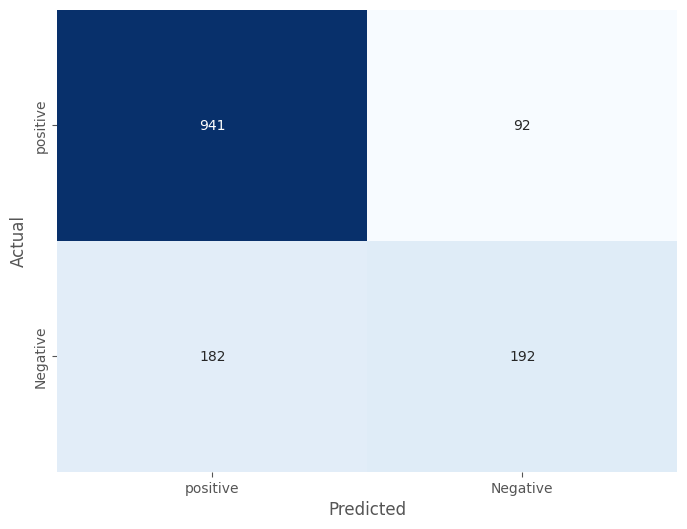

In [210]:
# visualize the metrics 
cm = confusion_matrix(y_eval, y_pred)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [211]:
#print the classification Report 

print ( metrics.classification_report (y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.51      0.58       374

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.81      0.80      1407



In [212]:
metrics2 = pd.DataFrame( [['Gradient Boosting', acc2,prec2, rec2, f12 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

In [213]:
metrics3 = metrics2.append(metrics1, ignore_index = True )

metrics3

Model  accuracy  precision     recal        f1
0  Gradient Boosting  0.805259   0.676056  0.513369  0.583587
1      Random Forest  0.778962   0.612100  0.459893  0.525191

## **MODEL 3 : DECISON TREES**

In [214]:
# Create an instane of the classifier 

classifier = DecisionTreeClassifier(random_state=42)

**Train/fit our data**

In [215]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Make Predictions**

In [216]:
y_pred = classifier.predict(X_eval)

In [217]:
pd.DataFrame(y_pred).head(2)

0
0  0
1  0

**Evaluate the model**

In [218]:
acc3 = metrics.accuracy_score(y_eval, y_pred)
prec3 = metrics.precision_score(y_eval, y_pred )
rec3 = metrics.recall_score(y_eval, y_pred )
f13 = metrics.f1_score(y_eval, y_pred )

In [219]:
print ('accuracy for model 3:', acc3)
print ('precision for model 3 :', prec3)
print ('rec for model 3:', rec3)
print ('f1 for model 3:', f13)

accuracy for model 3: 0.7391613361762616
precision for model 3 : 0.5094339622641509
rec for model 3: 0.5053475935828877
f1 for model 3: 0.5073825503355704


In [220]:
# Classification Report
print ( metrics.classification_report(y_eval,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.51      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.66      0.67      1407
weighted avg       0.74      0.74      0.74      1407



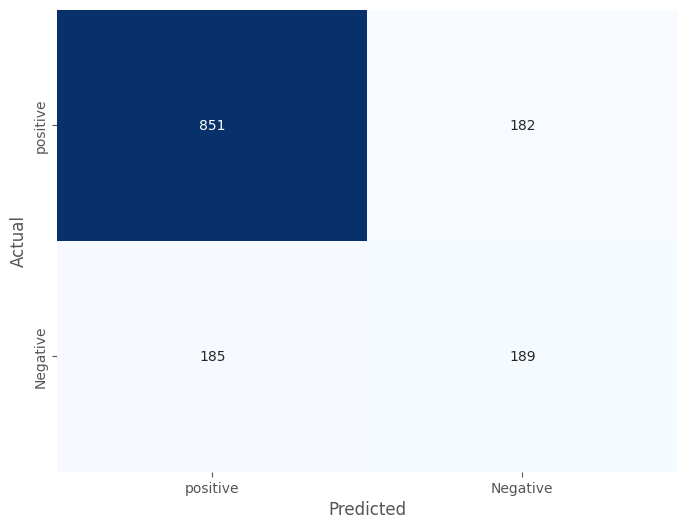

In [221]:
# Visualizing the metrics 
cm = confusion_matrix(y_eval, y_pred)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [222]:
metrics4 = pd.DataFrame( [['Decision Tree', acc3 ,prec3, rec3, f13 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

metrics4

Model  accuracy  precision     recal        f1
0  Decision Tree  0.739161   0.509434  0.505348  0.507383

In [223]:
metrics5 = metrics4.append(metrics3)

metrics5

Model  accuracy  precision     recal        f1
0      Decision Tree  0.739161   0.509434  0.505348  0.507383
0  Gradient Boosting  0.805259   0.676056  0.513369  0.583587
1      Random Forest  0.778962   0.612100  0.459893  0.525191

## **MODEL 4 : K MEANS**

In [224]:
# Create the KNN classifier
knn  = KNeighborsClassifier(n_neighbors=5)

**Train the classifier**

In [225]:
# Train the classifier on the training data

knn.fit(X_train, y_train)

KNeighborsClassifier()

**Make Predictions**

In [226]:
# Use the trained classifier to make predictions on the test data
y_pred = knn.predict(X_eval)


In [227]:
pd.DataFrame(y_pred).head(2)

0
0  1
1  0

**Evaluate the model**

In [228]:
acc4 = metrics.accuracy_score(y_eval, y_pred)
prec4 = metrics.precision_score(y_eval, y_pred )
rec4 = metrics.recall_score(y_eval, y_pred )
f14 = metrics.f1_score(y_eval, y_pred )

In [229]:
print ('accuracy model 4 :', acc4)
print ('precision model 4 :', prec4)
print ('rec model 4 :', rec4)
print ('f1 model 4  :', f14)

accuracy model 4 : 0.775408670931059
precision model 4 : 0.5947712418300654
rec model 4 : 0.48663101604278075
f1 model 4  : 0.5352941176470588


In [230]:
print (metrics.classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [231]:
metrics6 = pd.DataFrame( [['K Means', acc4 ,prec4, rec4, f14 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

In [232]:
metrics7 = metrics6.append(metrics5, ignore_index=True)
metrics7

Model  accuracy  precision     recal        f1
0            K Means  0.775409   0.594771  0.486631  0.535294
1      Decision Tree  0.739161   0.509434  0.505348  0.507383
2  Gradient Boosting  0.805259   0.676056  0.513369  0.583587
3      Random Forest  0.778962   0.612100  0.459893  0.525191

## **MODEL 5 : LOGISTIC REGRESSION**

**Create an instance**

In [233]:
logistic = LogisticRegression()

**Fit the model**

In [234]:
logistic.fit(X_train, y_train)

LogisticRegression()

**Make Predictions**

In [235]:
y_pred = logistic.predict(X_eval)

In [236]:
pd.DataFrame(y_pred).head()

0
0  1
1  1
2  0
3  1
4  0

Evaluate the model |

In [237]:
acc5 = metrics.accuracy_score(y_eval, y_pred)
prec5 = metrics.precision_score(y_eval, y_pred )
rec5 = metrics.recall_score(y_eval, y_pred )
f15 = metrics.f1_score(y_eval, y_pred )

In [238]:

print ('accuracy model 5 :', acc5)
print ('precision model 5 :', prec5)
print ('rec model 5 :', rec5)
print ('f1 model 5  :', f15)

accuracy model 5 : 0.8059701492537313
precision model 5 : 0.6723549488054608
rec model 5 : 0.5267379679144385
f1 model 5  : 0.5907046476761618


In [239]:
print (metrics.classification_report (y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [240]:
# plot ththe visualization

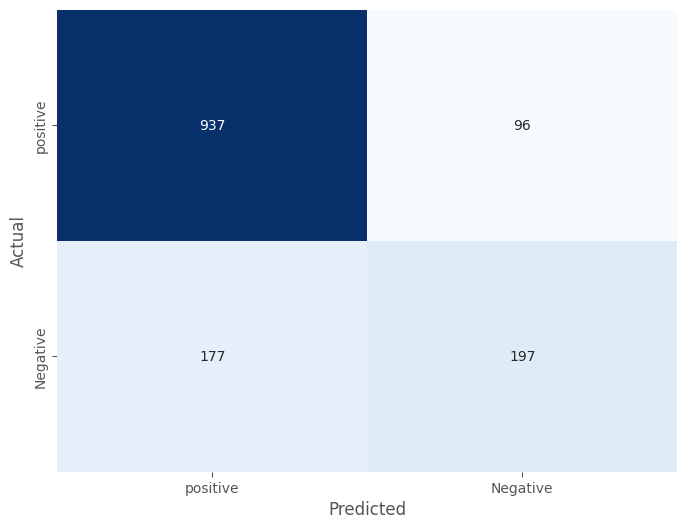

In [241]:
# visualize the metrics 

cm = confusion_matrix(y_eval, y_pred)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [242]:
metrics8 = pd.DataFrame( [['Logistic Regressions', acc5 ,prec5, rec5, f15 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

metrics8 = metrics7.append(metrics8, ignore_index=True)

metrics8

Model  accuracy  precision     recal        f1
0               K Means  0.775409   0.594771  0.486631  0.535294
1         Decision Tree  0.739161   0.509434  0.505348  0.507383
2     Gradient Boosting  0.805259   0.676056  0.513369  0.583587
3         Random Forest  0.778962   0.612100  0.459893  0.525191
4  Logistic Regressions  0.805970   0.672355  0.526738  0.590705

## **MODEL 6: SUPPORT VECTOR MODEL**

Create an instance (create 2 different classes)

model1 = svm.SVC()

In [243]:
# instance 1 linear is not specified
svm_non_linear = svm.SVC()

# instance 2 linear is specified
svm_linear = svm.SVC(kernel='linear')

**Train the 2 different models**

In [244]:
# model 1 
svm_non_linear.fit(X_train, y_train)

SVC()

In [245]:
# model 2
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

**Make predictions**

In [246]:
y_pred_linear = svm_linear.predict(X_eval)

pd.DataFrame(y_pred_linear).head()

0
0  1
1  0
2  0
3  1
4  0

In [247]:
y_pred_non_linear = svm_non_linear.predict(X_eval)

pd.DataFrame(y_pred_non_linear).head()

0
0  1
1  0
2  0
3  1
4  0

**Evaluate metrics**

In [248]:
# Linear 

acc6 = metrics.accuracy_score(y_eval, y_pred_linear)
prec6 = metrics.precision_score(y_eval, y_pred_linear )
rec6 = metrics.recall_score(y_eval, y_pred_linear )
f16 = metrics.f1_score(y_eval, y_pred_linear )

# Non linear
acc7 = metrics.accuracy_score(y_eval, y_pred_non_linear)
prec7 = metrics.precision_score(y_eval, y_pred_non_linear )
rec7 = metrics.recall_score(y_eval, y_pred_non_linear )
f17 = metrics.f1_score(y_eval, y_pred_non_linear )

In [249]:
print ('\n\033[1mEVALUATION METRICS SVM LINEAR\033[0m')
print ('accuracyr svm linear :', acc6)
print ('precision  svm linear :', prec6)
print ('rec  svm linear :', rec6)
print ('f1  svm linear  :', f16)
print ('\n')
print ('\033[1m-------------------------\033[0m')
print ('\033[1mEVALUATION METRICS SVM NON LINEAR\033[0m')
print ('accuracyr svm  non linear :', acc7)
print ('precision  svm non linear :', prec7)
print ('rec  svm non linear :', rec7)
print ('f1  svm non linear  :', f17)


EVALUATION METRICS SVM LINEAR
accuracyr svm linear : 0.8002842928216063
precision  svm linear : 0.6576271186440678
rec  svm linear : 0.5187165775401069
f1  svm linear  : 0.5799701046337816


-------------------------
EVALUATION METRICS SVM NON LINEAR
accuracyr svm  non linear : 0.8017057569296375
precision  svm non linear : 0.6954732510288066
rec  svm non linear : 0.45187165775401067
f1  svm non linear  : 0.5478119935170178


In [250]:
metrics9 = pd.DataFrame( [['SVM Linear', acc6 ,prec6, rec6, f16 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

metrics10 = pd.DataFrame( [['SVM non Linear', acc7 ,prec7, rec7, f17 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

In [251]:
print (metrics.classification_report(y_eval, y_pred_linear))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [252]:
print (metrics.classification_report(y_eval, y_pred_non_linear))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1033
           1       0.70      0.45      0.55       374

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



**Visualize the metrics**

In [253]:
#plt.colormaps()



CONFUSION MATRIX WITH Y_PRED_LINEAR 




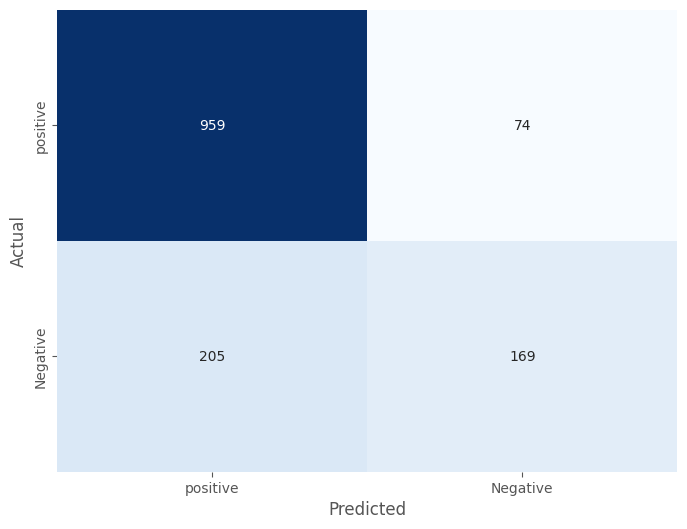




CONFUSION MATRIX WITH Y_PRED_NON_LINEAR 





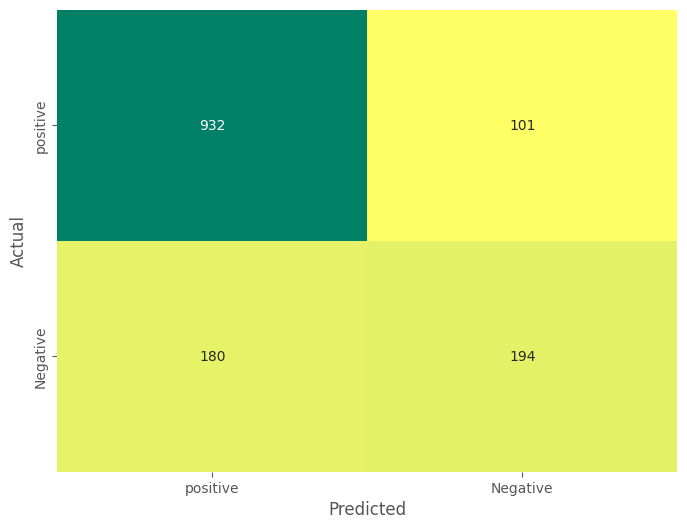

In [254]:
# visualize the metrics 
print ('\n')
print ( 'CONFUSION MATRIX WITH Y_PRED_LINEAR ')
print ('\n')

cm = confusion_matrix(y_eval, y_pred_non_linear)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )

#plt.title('svm non linear')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print ('\n')
print ( '\nCONFUSION MATRIX WITH Y_PRED_NON_LINEAR \n')
print ('\n')
# visualize the metrics 


cm = confusion_matrix(y_eval, y_pred_linear)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer_r', cbar=False,xticklabels= x, yticklabels= y )

#plt.title('svm non linear')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [255]:
metrics11 = metrics9.append([metrics8,metrics10], ignore_index=True)

metrics11

Model  accuracy  precision     recal        f1
0            SVM Linear  0.800284   0.657627  0.518717  0.579970
1               K Means  0.775409   0.594771  0.486631  0.535294
2         Decision Tree  0.739161   0.509434  0.505348  0.507383
3     Gradient Boosting  0.805259   0.676056  0.513369  0.583587
4         Random Forest  0.778962   0.612100  0.459893  0.525191
5  Logistic Regressions  0.805970   0.672355  0.526738  0.590705
6        SVM non Linear  0.801706   0.695473  0.451872  0.547812

# VISUALIZING THE MODEL METRICS BEFORE HYPERPARAMETER TUNING

Becasue our dataset is unbalanced and we shall be applying SMOTE before , For this visualizing we shall apply recall and f1 score. 

**Recall** Sensitivity to True Positive , 
           
           The proportion of actual positives that are actually classified as positive. 

**f1 score** 
            Takes into consideration both the recall and recall, and provides  
            a harmonic balance between the two  

In [257]:
fig = px.bar( metrics11 , x = 'Model', y = 'accuracy', color='f1', barmode = 'group')

fig.show()

# **HYPER PARAMETER TUNING**

Get a list of the modes trained 

In [258]:
metrics11['Model']

0              SVM Linear
1                 K Means
2           Decision Tree
3       Gradient Boosting
4           Random Forest
5    Logistic Regressions
6          SVM non Linear
Name: Model, dtype: object

**Select 4 models to do a hyperparameter tuning on**

Since the F1 score provides a harmonic balance between the mean of both the precision and recaal we shall use it to choose the top 4 models to do a **hyperparameter tuning** on. 

It takes into account both the false positives and false negatives. 

I.e; **F1_score = 2 ( (precision * recall ) / ( precision + recall) )**

In [260]:
to_tune = metrics11[['Model', 'accuracy']].reset_index().sort_values(by='accuracy', ascending = False )

to_tune.head(3)

index                 Model  accuracy
5      5  Logistic Regressions  0.805970
3      3     Gradient Boosting  0.805259
6      6        SVM non Linear  0.801706

**MODELS TO PERFORM HYPERPARAMETER TUNING ON**

1. Logistic Regression 

2. Gradient Boosting 

3. Support Vector Machine ( Non Linear ) 

# **MODEL 1 : LOGISTIC REGRESSION HYPERPARAMETER TUNING**

Get the parameters that we can manually tune 

In [261]:
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [262]:
parameters = {
    'C': [ 0.1 , 0.5 , 5, 7, 10],
    'max_iter': [200, 300, 500],
    'penalty': ['l2' ,  'l1'],
    'class_weight': 'Balanced',
    'class_weight': [None, 'balanced', {0: 1.0, 1: 2.0, 2: 0.5}]

    }

In [263]:
# GridSearchCV( )

In [264]:
searcher = GridSearchCV (estimator = logistic, 
                         param_grid = parameters, 
                         scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'],
                         refit = 'balanced_accuracy',
                         cv= 5,
                         verbose = 3)

In [265]:
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.792) balanced_accuracy: (test=0.702) f1: (test=0.565) precision: (test=0.636) recall: (test=0.508) total time=   0.1s
[CV 2/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.814) balanced_accuracy: (test=0.721) f1: (test=0.599) precision: (test=0.703) recall: (test=0.522) total time=   0.1s
[CV 3/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.791) balanced_accuracy: (test=0.703) f1: (test=0.567) precision: (test=0.631) recall: (test=0.515) total time=   0.1s
[CV 4/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.788) balanced_accuracy: (test=0.709) f1: (test=0.575) precision: (test=0.614) recall: (test=0.542) total time=   0.1s
[CV 5/5] END C=0.1, class_weight=None, max_iter=200, penalty=l2; accuracy: (test=0.797) balanced_accuracy: (test=0.701) f1: (test=0.56

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 5, 7, 10],
                         'class_weight': [None, 'balanced',
                                          {0: 1.0, 1: 2.0, 2: 0.5}],
                         'max_iter': [200, 300, 500], 'penalty': ['l2', 'l1']},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall'],
             verbose=3)

In [266]:
pd.DataFrame(searcher.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.068886      0.007358         0.021969        0.003467     0.1   
1        0.001664      0.000094         0.000000        0.000000     0.1   
2        0.074510      0.010979         0.029583        0.004974     0.1   
3        0.002144      0.001025         0.000000        0.000000     0.1   
4        0.070131      0.009750         0.023685        0.000551     0.1   
..            ...           ...              ...             ...     ...   
85       0.002496      0.001524         0.000000        0.000000      10   
86       0.058885      0.004015         0.026446        0.001784      10   
87       0.002120      0.000598         0.000000        0.000000      10   
88       0.059861      0.004546         0.025819        0.002578      10   
89       0.001768      0.000131         0.000000        0.000000      10   

          param_class_weight param_max_iter param_penalty  \
0                       None            200            l2   
1                       None            200            l1   
2                       None            300            l2   
3                       None            300            l1   
4                       None            500            l2   
..                       ...            ...           ...   
85  {0: 1.0, 1: 2.0, 2: 0.5}            200            l1   
86  {0: 1.0, 1: 2.0, 2: 0.5}            300            l2   
87  {0: 1.0, 1: 2.0, 2: 0.5}            300            l1   
88  {0: 1.0, 1: 2.0, 2: 0.5}            500            l2   
89  {0: 1.0, 1: 2.0, 2: 0.5}            500            l1   

                                               params  split0_test_accuracy  \
0   {'C': 0.1, 'class_weight': None, 'max_iter': 2...              0.792000   
1   {'C': 0.1, 'class_weight': None, 'max_iter': 2...                   NaN   
2   {'C': 0.1, 'class_weight': None, 'max_iter': 3...              0.792000   
3   {'C': 0.1, 'class_weight': None, 'max_iter': 3...                   NaN   
4   {'C': 0.1, 'class_weight': None, 'max_iter': 5...              0.792000   
..                                                ...                   ...   
85  {'C': 10, 'class_weight': {0: 1.0, 1: 2.0, 2: ...                   NaN   
86  {'C': 10, 'class_weight': {0: 1.0, 1: 2.0, 2: ...              0.787556   
87  {'C': 10, 'class_weight': {0: 1.0, 1: 2.0, 2: ...                   NaN   
88  {'C': 10, 'class_weight': {0: 1.0, 1: 2.0, 2: ...              0.787556   
89  {'C': 10, 'class_weight': {0: 1.0, 1: 2.0, 2: ...                   NaN   

    ...  std_test_precision  rank_test_precision  split0_test_recall  \
0   ...            0.030649                    1            0.508361   
1   ...                 NaN                   46                 NaN   
2   ...            0.030649                    1            0.508361   
3   ...                 NaN                   46                 NaN   
4   ...            0.030649                    1            0.508361   
..  ...                 ...                  ...                 ...   
85  ...                 NaN                   46                 NaN   
86  ...            0.021719                   19            0.749164   
87  ...                 NaN                   46                 NaN   
88  ...            0.021719                   19            0.749164   
89  ...                 NaN                   46                 NaN   

    split1_test_recall  split2_test_recall  split3_test_recall  \
0             0.521739            0.515050            0.541806   
1                  NaN                 NaN                 NaN   
2             0.521739            0.515050            0.541806   
3                  NaN                 NaN                 NaN   
4             0.521739            0.515050            0.541806   
..                 ...                 ...                 ...   
85                 NaN                 NaN                 NaN   
86            0.

In [267]:
searcher.best_params_

{'C': 0.5, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2'}

In [268]:
searcher.best_estimator_

LogisticRegression(C=0.5, class_weight='balanced', max_iter=200)

In [269]:
searcher.best_score_

0.7609246317426125

In [270]:
searcher.best_index_

24

In [271]:
best_models = [searcher.best_estimator_]

# **MODEL 2 HYPERPARAMETER TUNING : GRADIENT BOOSTING**

Get the parameters to adjust 

In [272]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [273]:
parameters = {
    'n_estimators': [100, 150, 200],
    'random_state': [12, 15, 20, 30],
    'max_depth': [1, 2, 3],
    'learning_rate': [0.1, 0.2, 0.5],
}

In [274]:
searcher = GridSearchCV (estimator = gb, 
                         param_grid = parameters, 
                         scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'],
                         refit = 'balanced_accuracy',
                         cv= 5,
                         verbose = 3)

In [275]:
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100, random_state=12; accuracy: (test=0.782) balanced_accuracy: (test=0.666) f1: (test=0.505) precision: (test=0.638) recall: (test=0.418) total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100, random_state=12; accuracy: (test=0.816) balanced_accuracy: (test=0.707) f1: (test=0.578) precision: (test=0.740) recall: (test=0.475) total time=   0.4s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100, random_state=12; accuracy: (test=0.792) balanced_accuracy: (test=0.679) f1: (test=0.528) precision: (test=0.665) recall: (test=0.438) total time=   0.4s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100, random_state=12; accuracy: (test=0.792) balanced_accuracy: (test=0.693) f1: (test=0.552) precision: (test=0.646) recall: (test=0.482) total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100, random_sta

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [100, 150, 200],
                         'random_state': [12, 15, 20, 30]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall'],
             verbose=3)

In [276]:
pd.DataFrame(searcher.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.338701      0.004734         0.010636        0.001282   
1         0.335944      0.004805         0.009671        0.000106   
2         0.339375      0.005160         0.010296        0.000704   
3         0.405743      0.072812         0.013555        0.002698   
4         0.736638      0.018059         0.016918        0.000988   
..             ...           ...              ...             ...   
103       1.137036      0.005591         0.011305        0.000619   
104       1.847574      0.340136         0.016437        0.003569   
105       1.515566      0.007288         0.011971        0.000343   
106       1.846304      0.333125         0.015516        0.002791   
107       1.591480      0.141818         0.014197        0.003180   

    param_learning_rate param_max_depth param_n_estimators param_random_state  \
0                   0.1               1                100                 12   
1                   0.1               1                100                 15   
2                   0.1               1                100                 20   
3                   0.1               1                100                 30   
4                   0.1               1                150                 12   
..                  ...             ...                ...                ...   
103                 0.5               3                150                 30   
104                 0.5               3                200                 12   
105                 0.5               3                200                 15   
106                 0.5               3                200                 20   
107                 0.5               3                200                 30   

                                                params  split0_test_accuracy  \
0    {'learning_rate': 0.1, 'max_depth': 1, 'n_esti...              0.782222   
1    {'learning_rate': 0.1, 'max_depth': 1, 'n_esti...              0.782222   
2    {'learning_rate': 0.1, 'max_depth': 1, 'n_esti...              0.782222   
3    {'learning_rate': 0.1, 'max_depth': 1, 'n_esti...              0.782222   
4    {'learning_rate': 0.1, 'max_depth': 1, 'n_esti...              0.787556   
..                                                 ...                   ...   
103  {'learning_rate': 0.5, 'max_depth': 3, 'n_esti...              0.761778   
104  {'learning_rate': 0.5, 'max_depth': 3, 'n_esti...              0.758222   
105  {'learning_rate': 0.5, 'max_depth': 3, 'n_esti...              0.756444   
106  {'learning_rate': 0.5, 'max_depth': 3, 'n_esti...              0.758222   
107  {'learning_rate': 0.5, 'max_depth': 3, 'n_esti...              0.757333   

     ...  std_test_precision  rank_test_precision  split0_test_recall  \
0    ...            0.036074                    1            0.418060   
1    ...            0.036074                    1            0.418060   
2    ...            0.036074                    1            0.418060   
3    ...            0.036074                    1            0.418060   
4    ...            0.035843                    5            0.461538   
..   ...                 ...                  ...                 ...   
103  ...            0.028999                  102            0.478261   
104  ...            0.032042                  105            0.481605   
105  ...            0.035191                  107            0.478261   
106  ...            0.035345                  108            0.481605   
107  ...            0.037275                  106            0.481605   

     split1_test_recall  split2_test_recall  split3_test_recall  \
0              0.474916            0.438127            0.481605   
1              0.474916            0.438127            0.481605   
2              0.474916            0.438127            0.481605   
3              0.474916            0.438127            0.481605   
4              0.501672       

In [277]:
searcher.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, random_state=12)

In [278]:
searcher.best_score_

0.7130835634520232

In [279]:
searcher.best_index_

72

In [280]:
searcher.best_params_

{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 100, 'random_state': 12}

In [281]:
best_models

[LogisticRegression(C=0.5, class_weight='balanced', max_iter=200)]

In [282]:
best_model2 = [searcher.best_params_]

In [283]:
best_models

[LogisticRegression(C=0.5, class_weight='balanced', max_iter=200)]

In [284]:
best_model2

[{'learning_rate': 0.5,
  'max_depth': 1,
  'n_estimators': 100,
  'random_state': 12}]

# **MODEL 3 HYPERPARAMETER TUNING : SUPPORT VECTOR MACHINE**

Get the parameters 

In [285]:
svm_linear.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [286]:
parameters = {
    'random_state': [None, 10, 12, 30], 
    'max_iter': [-1, 1, 3] ,
}

In [287]:
searcher = GridSearchCV (estimator = svm_linear, 
                         param_grid = parameters, 
                         scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall'],
                         refit = 'balanced_accuracy',
                         cv= 5,
                         verbose = 3)

In [288]:
searcher.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_iter=-1, random_state=None; accuracy: (test=0.778) balanced_accuracy: (test=0.685) f1: (test=0.539) precision: (test=0.601) recall: (test=0.488) total time=   1.2s
[CV 2/5] END max_iter=-1, random_state=None; accuracy: (test=0.803) balanced_accuracy: (test=0.712) f1: (test=0.583) precision: (test=0.665) recall: (test=0.518) total time=   1.2s
[CV 3/5] END max_iter=-1, random_state=None; accuracy: (test=0.782) balanced_accuracy: (test=0.699) f1: (test=0.560) precision: (test=0.605) recall: (test=0.522) total time=   1.1s
[CV 4/5] END max_iter=-1, random_state=None; accuracy: (test=0.780) balanced_accuracy: (test=0.708) f1: (test=0.572) precision: (test=0.594) recall: (test=0.552) total time=   0.7s
[CV 5/5] END max_iter=-1, random_state=None; accuracy: (test=0.788) balanced_accuracy: (test=0.700) f1: (test=0.562) precision: (test=0.624) recall: (test=0.512) total time=   0.8s
[CV 1/5] END max_iter=-1, random_s

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'max_iter': [-1, 1, 3],
                         'random_state': [None, 10, 12, 30]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall'],
             verbose=3)

In [289]:
pd.DataFrame(searcher.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.895784      0.173083         0.101308        0.034137   
1        0.678846      0.024564         0.072963        0.002528   
2        0.678430      0.017524         0.077888        0.005691   
3        0.932682      0.134945         0.124478        0.024198   
4        0.007670      0.000328         0.013555        0.000144   
5        0.007651      0.000088         0.014639        0.001828   
6        0.007713      0.000265         0.013660        0.000083   
7        0.007493      0.000387         0.014806        0.000893   
8        0.008637      0.000344         0.015726        0.000829   
9        0.006655      0.001229         0.009926        0.003252   
10       0.006134      0.000607         0.008968        0.001132   
11       0.005773      0.000196         0.008699        0.001218   

   param_max_iter param_random_state                                  params  \
0              -1               None  {'max_iter': -1, 'random_state': None}   
1              -1                 10    {'max_iter': -1, 'random_state': 10}   
2              -1                 12    {'max_iter': -1, 'random_state': 12}   
3              -1                 30    {'max_iter': -1, 'random_state': 30}   
4               1               None   {'max_iter': 1, 'random_state': None}   
5               1                 10     {'max_iter': 1, 'random_state': 10}   
6               1                 12     {'max_iter': 1, 'random_state': 12}   
7               1                 30     {'max_iter': 1, 'random_state': 30}   
8               3               None   {'max_iter': 3, 'random_state': None}   
9               3                 10     {'max_iter': 3, 'random_state': 10}   
10              3                 12     {'max_iter': 3, 'random_state': 12}   
11              3                 30     {'max_iter': 3, 'random_state': 30}   

    split0_test_accuracy  split1_test_accuracy  split2_test_accuracy  ...  \
0               0.777778              0.802667              0.782222  ...   
1               0.777778              0.802667              0.782222  ...   
2               0.777778              0.802667              0.782222  ...   
3               0.777778              0.802667              0.782222  ...   
4               0.251556              0.236444              0.261333  ...   
5               0.251556              0.236444              0.261333  ...   
6               0.251556              0.236444              0.261333  ...   
7               0.251556              0.236444              0.261333  ...   
8               0.600889              0.479111              0.610667  ...   
9               0.600889              0.479111              0.610667  ...   
10              0.600889              0.479111              0.610667  ...   
11              0.600889              0.479111              0.610667  ...   

    std_test_precision  rank_test_precision  split0_test_recall  \
0             0.025866                    1            0.488294   
1             0.025866                    1            0.488294   
2             0.025866                    1            0.488294   
3             0.025866                    1            0.488294   
4             0.015884                    9            0.454849   
5             0.015884                    9            0.454849   
6             0.015884                    9            0.454849   
7             0.015884                    9            0.454849   
8             0.090133                    5            0.899666   
9             0.090133                    5            0.899666   
10            0.090133                    5            0.899666   
11            0.090133                    5            0.899666   

    split1_test_recall  split2_test_recall  split3_test_recall  \
0             0.518395            0.521739            0.551839   
1             0.518395            0.521739            0.551839   
2     

In [290]:
searcher.best_params_

{'max_iter': -1, 'random_state': None}

In [291]:
searcher.best_estimator_

SVC(kernel='linear')

In [292]:
searcher.best_score_

0.700843813518832

In [293]:
best_models3 = [searcher.best_params_]

best_models3

[{'max_iter': -1, 'random_state': None}]

In [294]:
pd.DataFrame (y_pred).head(10)

0
0  1
1  1
2  0
3  1
4  0
5  0
6  0
7  0
8  0
9  1

In [295]:
y_pred.shape

(1407,)

In [296]:
pd.DataFrame(y_pred).value_counts()

0    1114
1     293
dtype: int64

In [297]:
pd.DataFrame(y_train).value_counts()

churn
0        4130
1        1495
dtype: int64

## **Of the 3 Machine Learning Models selected**

*   LOGISTIC REGRESSION
---
    Best Score = 76.09% 

    LogisticRegression ( c=0.5, class_weight='balanced', max_iter=200) 

*   GRADIENT BOOSTING 
---
    Best Score = 71.31%

    GradientBoostingClassifier ( learning_rate = 0.5, max_depth = 1, random_depth = 12)

*   SUPPORT VECTOR MACHINE (Kernel = 'linear')
---
    Best Score =  70.08%

    SVC.svm(kernel='linear') 

Since we are to use only one model , we will select the **Logistic Regression Model** and carry on with the hyper parameter tuning in order to achieve the 



highest **F1 Score** as possible. 





# HYPERPARAMETR TUNING FOR LINEAR REGRESSION 

### Visualize the metrics before parameter tuning 

In [298]:
LogisticRegression ( C =0.5, class_weight='balanced', max_iter=200) 

LogisticRegression(C=0.5, class_weight='balanced', max_iter=200)

In [299]:
# Learn from the prediction 

lg = LogisticRegression ( C =0.5, class_weight='balanced', max_iter=200) 

lg.fit( X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=200)

In [300]:
y_pred = lg.predict(X_eval)

pd.DataFrame(y_pred).head()

0
0  1
1  1
2  0
3  1
4  0

In [301]:
X_eval.shape 

(1407, 33)

In [302]:
print (metrics.classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.51      0.80      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [303]:
accuracy1 = { 'original accuracy': 0.76}

In [304]:
accuracy1

{'original accuracy': 0.76}

In [305]:
pd.DataFrame ([accuracy1])

original accuracy
0               0.76

## **STEP 1 : CHECK THE DISTRIBUTION OF THE TARGET**

(array([5163.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

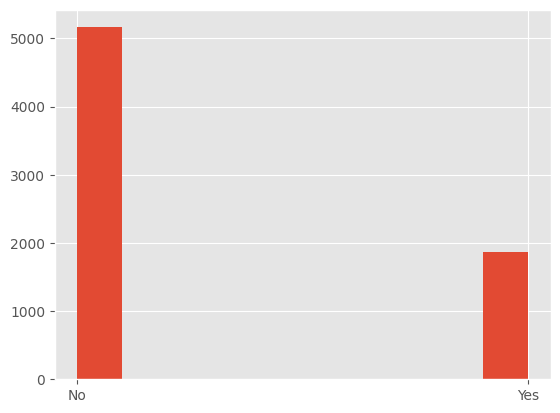

In [306]:
plt.hist(df_new['Churn'])

In [307]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [308]:
from imblearn.over_sampling import SMOTE

In [309]:
# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [310]:
print(X_train_balanced.shape)
print(y_train_balanced.shape)

(8260, 33)
(8260,)


In [311]:
lg.fit( X_train_balanced , y_train_balanced)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=200)

In [312]:
y_pred_bal = lg.predict(X_eval)

pd.DataFrame(y_pred_bal).head()

0
0  1
1  1
2  0
3  1
4  0

In [313]:
print (metrics.classification_report(y_eval, y_pred_bal))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.74      0.76      1407



In [314]:
accuracy1

{'original accuracy': 0.76}

In [316]:
accuracy2 = {'after smote ' : 0.76}

In [317]:
accuracy = []

accuracy.append([accuracy1, accuracy2])

In [318]:
pd.DataFrame (accuracy).T

0
0  {'original accuracy': 0.76}
1       {'after smote ': 0.76}

## **3. FEATURE IMPORTANCE INSPECTION**

In [319]:
from sklearn.inspection import permutation_importance

In [320]:
# Initialize model
model = lg

In [321]:
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)

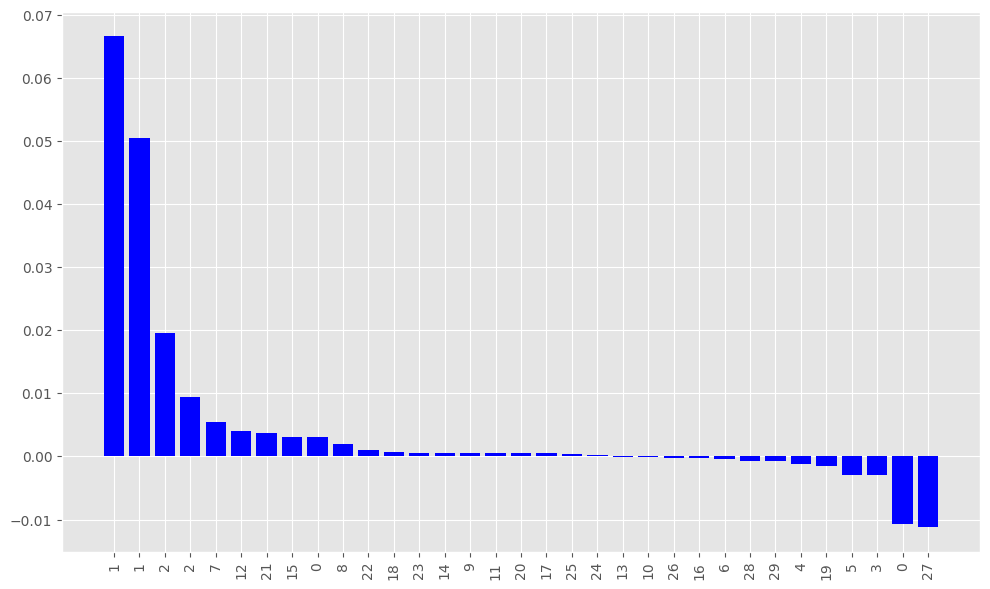

In [322]:
# Get feature importances and names
importances = result.importances_mean
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Visualize the feature importances
plt.figure(figsize=(10, 6))
#plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.tight_layout()
plt.show()






In [323]:
columns_to_drop = [ '8', '22', '18', '23', '14', '9', '11', '20', '17', '25', '24', '13', '10', '26', '16', '6', '28', '29', '4' ]

columns_to_drop2 = [ 8, 22, 18, 23, 14, 9, 11, 20, 17, 25, 24, 13, 10, 26, 16, 6, 28, 29, 4 ]

IndexError: ignored

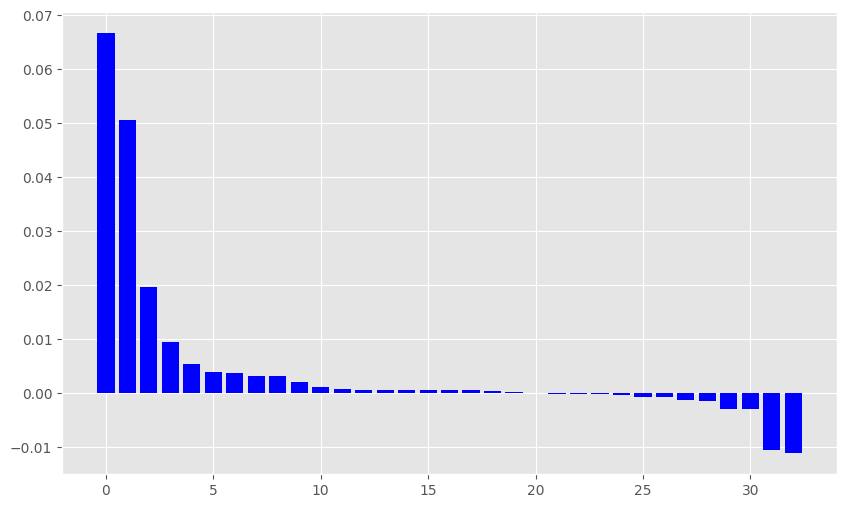

In [324]:
# Drop columns from the x
X_train = X_train.drop( columns_to_drop2, axis=1)

# Get feature importances and names
importances = result.importances_mean
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Visualize the feature importances
plt.figure(figsize=(10, 6))
#plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.tight_layout()
plt.show()


In [325]:
lg.fit( X_train_balanced , y_train_balanced)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=200)

In [326]:
lg.fit(X_train,y_train_balanced[:5625]) 

LogisticRegression(C=0.5, class_weight='balanced', max_iter=200)

In [327]:
y_pred2 = lg.predict(X_eval.drop( columns_to_drop2, axis=1))

In [328]:
print (metrics.classification_report(y_eval, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



# **CONCLUSION**

In [329]:
predictions = pd.DataFrame((y_pred2), columns=['prediction'])

original = pd.DataFrame((churn), columns=['original'])

In [333]:
original

original
0            0
1            0
2            1
3            0
4            1
...        ...
7027         0
7028         0
7029         0
7030         1
7031         0

[7032 rows x 1 columns]

In [332]:
predictions

prediction
0              1
1              1
2              0
3              1
4              0
...          ...
1402           0
1403           0
1404           0
1405           0
1406           0

[1407 rows x 1 columns]

# **CONCLUSIONS AND RECOMMENDATIONS**

Most customers without internet usage churn out the least, wheras customers using Fibre optic being the most have a high churn rate as compared to other customers. Here we would recommend the company to come up with better packages for customers with fibre optic. 

Since most customers who churn have do not have dependents, this would suggest that these customers do not have a person back at home to consume these services. It would benefit the company to introduce more mobile services or products consumable to senior citizens. 

The company has the following subscription products, monthly , yearly and 2 year products. Of these products monthly products generate the most revenue , even in the long run. Which means the company should investigate why most clients prefer short term products and come up with better methods. 

Also , most people churn out of the companies within the first months did not do so because of the monthly charges. So it is prudent for amazing offers be given to the customers after the first 6 months in a bit to improve customer retention. 

Since most customers are non senior citizens , most probably people within this category are youthful, This would suggest that when they get into advanced stages they would probably churn, So come up with better methods to walk with them through out their journe. 
